**© 2023 Scott A. Bruce. Do not distribute.**

# Basic data visualization in Python

This notebook follows Chapter 4 in the Python Workshop textbook starting from the section on Plotting Techniques.  Herein, we will use the `matplotlib` and `seaborn` packages to create basic visualizations in Python.  Each visualization comes with strengths and weaknesses and choosing an appropriate visualization for the task at hand is often a source of frustration for content creators and readers alike.  Choose wisely!  Some general guidance is provided in what follows.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Exercise 62 (scatter plot)

Scatter plots are a great choice when visualizing a collection of independent data points.

In [2]:
temperature = [14.2, 16.4, 11.9, 12.5, 18.9, 22.1, 19.4, 23.1, 25.4, 18.1, 22.6, 17.2]
sales = [215.20, 325.00, 185.20, 330.20, 418.60, 520.25, 412.20, 614.60, 544.80, 421.40, 445.50, 408.10]

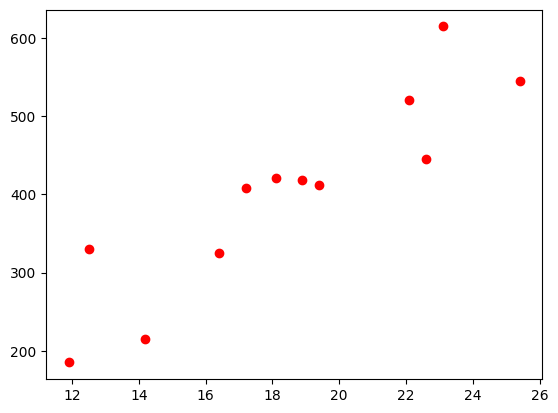

<function matplotlib.pyplot.show(close=None, block=None)>

In [3]:
plt.scatter(temperature, sales, color='red')
plt.show()
plt.show


Text(0.5, 1.0, 'Ice-cream sales versus Temperature')

Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Sales')

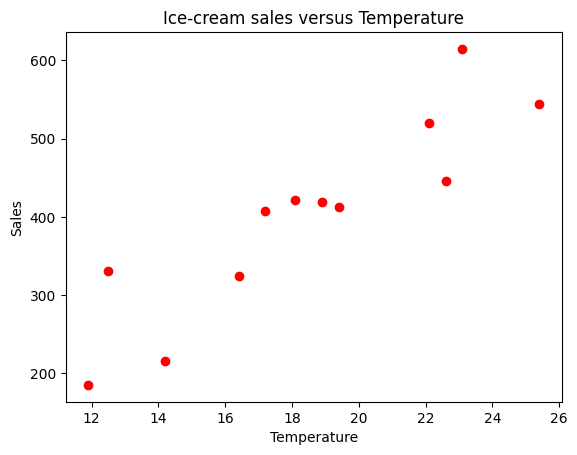

In [4]:
plt.title('Ice-cream sales versus Temperature')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.scatter(temperature, sales, color='red')
plt.show()

## 2. Exercise 63 (line plot)

Line plots are useful when visualizing data points that are connected in some meaningful way over the x-axis (e.g. repeated measurements over time).

In [5]:
stock_price = [190.64, 190.09, 192.25, 191.79, 194.45, 196.45, 196.45, 196.42, 200.32, 200.32, 
               200.85, 199.2, 199.2, 199.2, 199.46, 201.46, 197.54, 201.12, 203.12, 203.12, 203.12, 202.83, 202.83, 203.36, 206.83, 204.9, 204.9, 204.9, 204.4, 204.06]

Text(0.5, 1.0, 'Opening Stock Prices')

Text(0.5, 0, 'Days')

Text(0, 0.5, '$ USD')

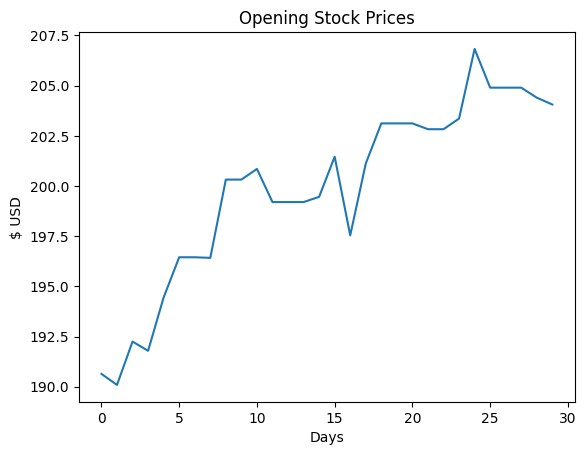

In [6]:
plt.plot(stock_price)
plt.title('Opening Stock Prices')
plt.xlabel('Days')
plt.ylabel('$ USD')
plt.show()

In [7]:
t = list(range(1, 31))

([<matplotlib.axis.XTick at 0x7f6919619c00>,
 [Text(1, 0, '1'),
  Text(8, 0, '8'),
  Text(15, 0, '15'),
  Text(22, 0, '22'),
  Text(28, 0, '28')])

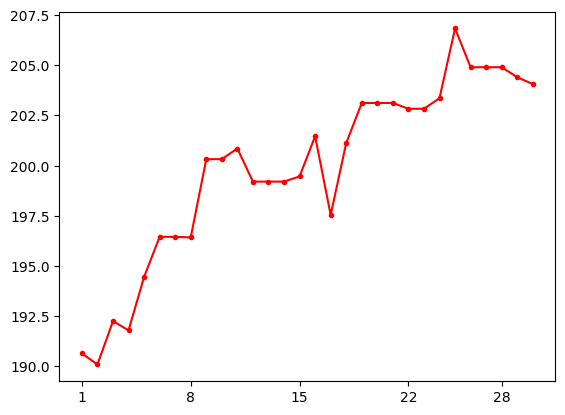

In [8]:
plt.plot(t, stock_price, marker='.', color='red')
plt.xticks([1, 8, 15, 22, 28])
plt.show()

## 3. Exercise 64 (bar plot)

Bar plots are generally useful in portraying counts of items across categories (each with its own bar).

In [9]:
grades = ['A', 'B', 'C', 'D', 'E', 'F']
students_count = [20, 30, 10, 5, 8, 2]

<BarContainer object of 6 artists>

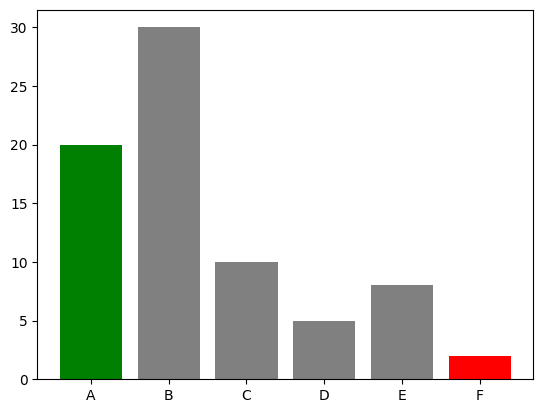

In [10]:
plt.bar(grades, students_count, color=['green', 'gray', 'gray', 'gray', 'gray', 'red'])

Text(0.5, 1.0, 'Grades Bar Plot for Biology Class')

Text(0.5, 0, 'Grade')

Text(0, 0.5, 'Num Students')

<BarContainer object of 6 artists>

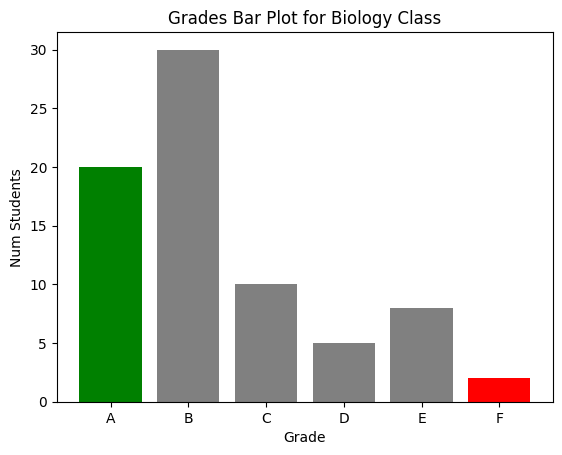

In [11]:
plt.title('Grades Bar Plot for Biology Class')
plt.xlabel('Grade')
plt.ylabel('Num Students')
plt.bar(grades, students_count, color=['green', 'gray', 'gray', 'gray', 'gray', 'red'])
plt.show()

<BarContainer object of 6 artists>

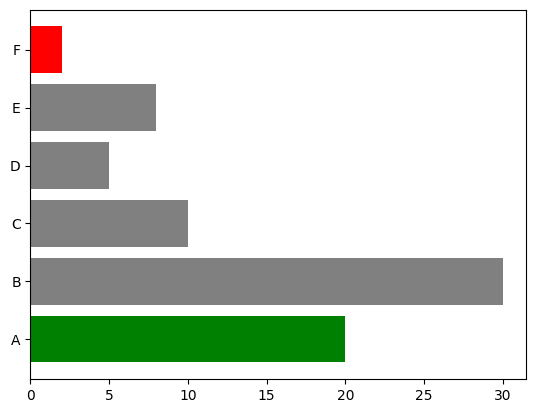

In [12]:
plt.barh(grades, students_count, color=['green', 'gray', 'gray', 'gray', 'gray', 'red'])

## 4. Exercise 65 (pie chart)

Use sparingly.  Pie charts are useful for conveying fractional data and percentages.  However, pie charts make it difficult to compare the relative proportions across many categories.  Often times a bar chart or a table can be used in place of a pie chart, which can enable more accurate comparisons across categories.

In [13]:
labels = ['Monica', 'Adrian', 'Jared']
num = [230, 100, 98] # Note that this does not need to be percentages

([<matplotlib.patches.Wedge at 0x7f691941cb80>,
 [Text(-0.12889029014495987, 1.0924226714538416, 'Monica'),
  Text(-0.6228249215772513, -0.906691301966822, 'Adrian'),
  Text(0.8274673515900017, -0.7247742973178813, 'Jared')],
 [Text(-0.07030379462452356, 0.5958669117020954, '53.7%'),
  Text(-0.33972268449668247, -0.49455889198190284, '23.4%'),
  Text(0.4513458281400009, -0.3953314349006625, '22.9%')])

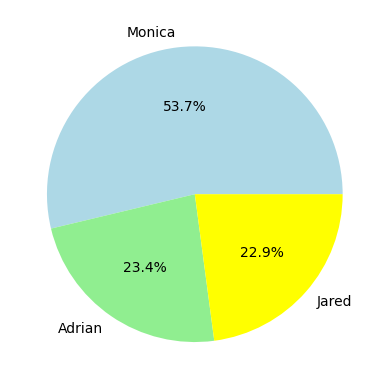

In [14]:
plt.pie(num, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'yellow'])

Text(0.5, 1.0, 'Voting Results: Club President')

([<matplotlib.patches.Wedge at 0x7f6919487d30>,
 [Text(-0.12889029014495987, 1.0924226714538416, 'Monica'),
  Text(-0.6228249215772513, -0.906691301966822, 'Adrian'),
  Text(0.8274673515900017, -0.7247742973178813, 'Jared')],
 [Text(-0.07030379462452356, 0.5958669117020954, '53.7%'),
  Text(-0.33972268449668247, -0.49455889198190284, '23.4%'),
  Text(0.4513458281400009, -0.3953314349006625, '22.9%')])

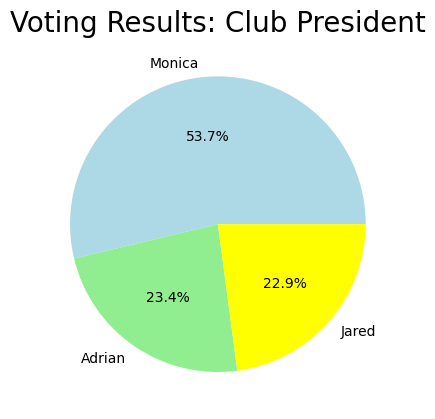

In [15]:
plt.title('Voting Results: Club President', fontdict={'fontsize': 20})
plt.pie(num, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'yellow'])
plt.show()

## 5. Exercise 66 (heat map)

Heat maps are an excellent visualization for illustrating the relationship between two categorical variables.  First, we will define a heatmap function.

In [16]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar

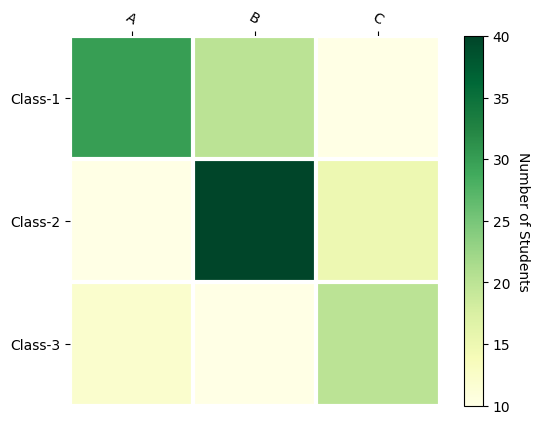

In [17]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([
    [30, 20, 10,],
    [10, 40, 15],
    [12, 10, 20]
])

im, cbar = heatmap(data, ['Class-1', 'Class-2', 'Class-3'], ['A', 'B', 'C'], cmap='YlGn', cbarlabel='Number of Students')


Notice that we used a `numpy` array to store the data for the heatmap?  More on this later...

It would be helpful to be able to provide more information about the particular values corresponding to each color.  To accomplish this, we can define another function (below) that does this. 

In [18]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    import matplotlib
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

/tmp/ipykernel_27/2292961765.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  kw.update(color=textcolors[im.norm(data[i, j]) > threshold])


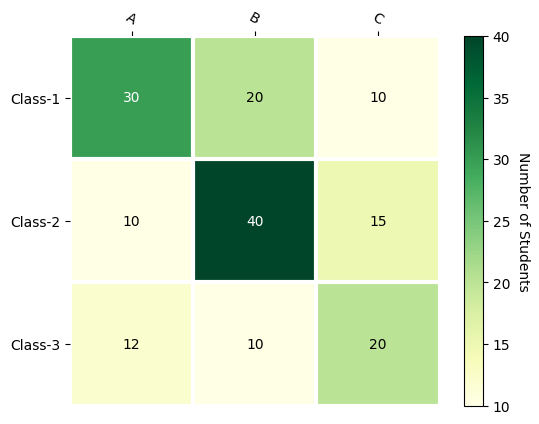

In [19]:
im, cbar = heatmap(data, ['Class-1', 'Class-2', 'Class-3'], ['A', 'B', 'C'], cmap='YlGn', cbarlabel='Number of Students')
texts = annotate_heatmap(im, valfmt="{x}")

## 6. Exercise 67 (histogram + density plot)

When visualizing the distribution of a continuous variable, histograms and density plots are a great option.

<AxesSubplot: ylabel='Count'>

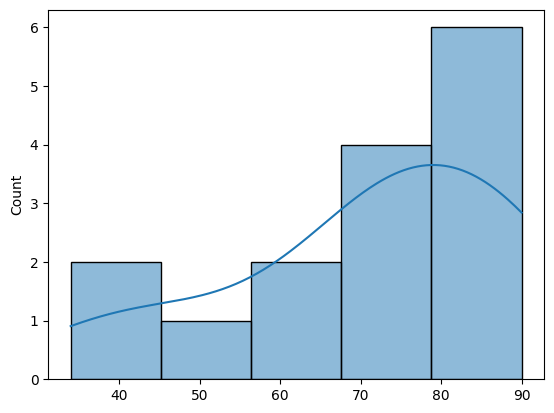

In [48]:
data = [90, 80, 50, 42, 89, 78, 34, 70, 67, 73, 74, 80, 60, 90, 90]
sns.histplot(data,kde=True)

Text(0.5, 1.0, 'Density Plot')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Density')

<AxesSubplot: title={'center': 'Density Plot'}, xlabel='Score', ylabel='Density'>

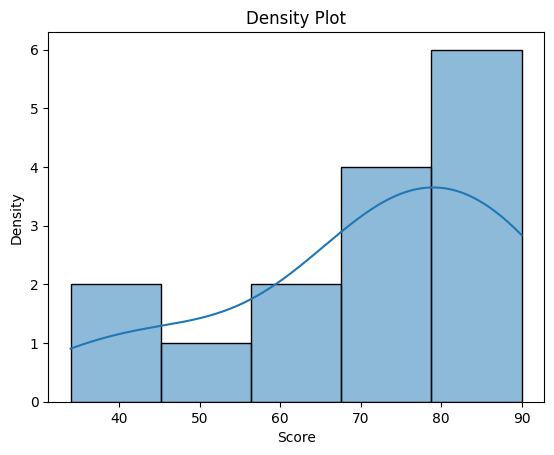

In [49]:
plt.title('Density Plot')
plt.xlabel('Score')
plt.ylabel('Density')
sns.histplot(data,kde=True)
plt.show()

Text(0.5, 1.0, 'Weight Dataset - Contour Plot')

Text(0, 0.5, 'height (cm)')

Text(0.5, 0, 'weight (cm)')

<AxesSubplot: title={'center': 'Weight Dataset - Contour Plot'}, xlabel='weight (cm)', ylabel='height (cm)'>

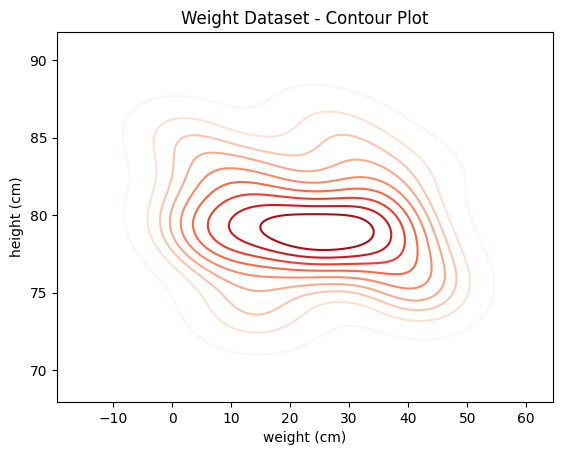

In [22]:
weight=[85.08,79.25,85.38,82.64,80.51,77.48,79.25,78.75,77.21,73.11,82.03,82.54,
        74.62,79.82,79.78,77.94,83.43,73.71,80.23,78.27,78.25,80.00,76.21,86.65,
        78.22,78.51,79.60,83.88,77.68,78.92,79.06,85.30,82.41,79.70,80.16,81.11,
        79.58,77.42,75.82,74.09,78.31,83.17,75.20,76.14]
plt.title('Weight Dataset - Contour Plot')
plt.ylabel('height (cm)')
plt.xlabel('weight (cm)')
sns.kdeplot(x=list(range(1,45)),y=weight, cmap="Reds")

## 7. More on visualizing univariate and bivariate distributions from the seaborn package documentation

For more details visit https://seaborn.pydata.org/tutorial/distributions.html

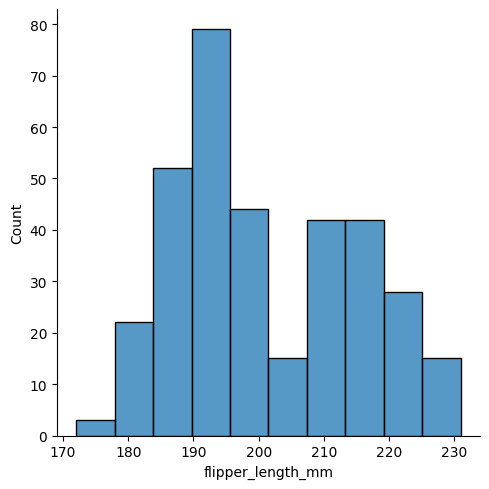

In [23]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

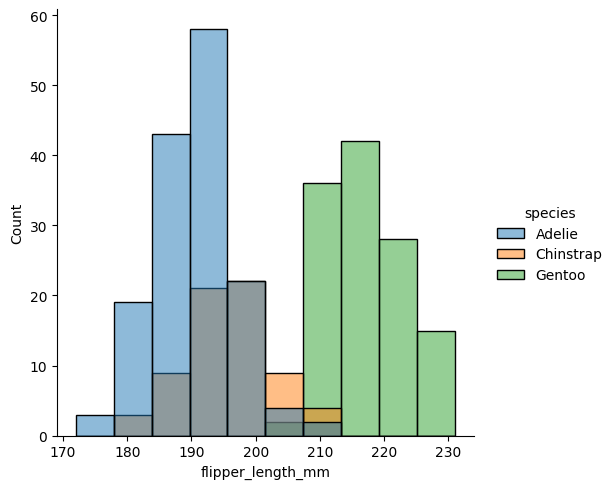

In [24]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

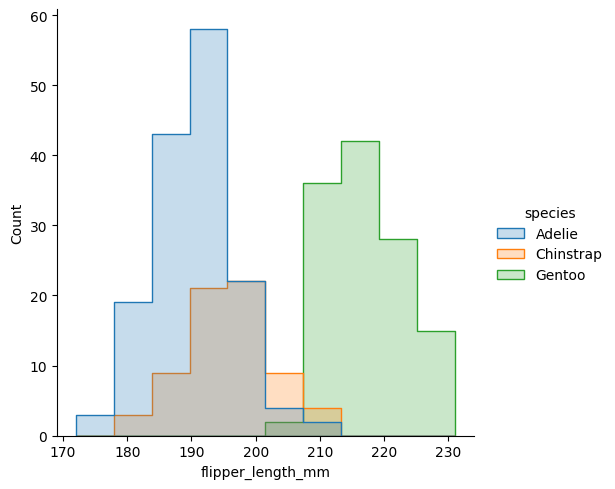

In [25]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

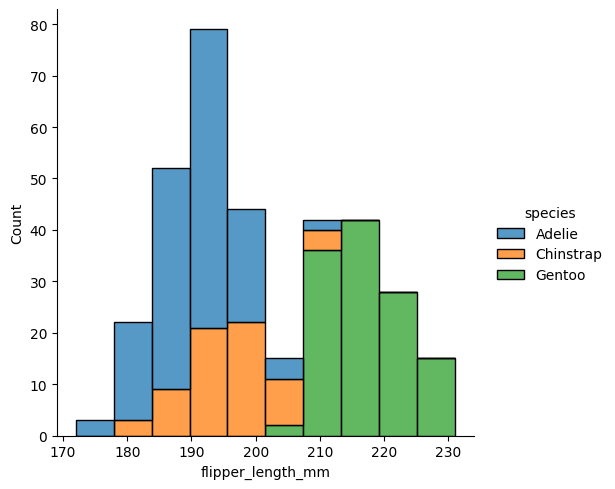

In [26]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

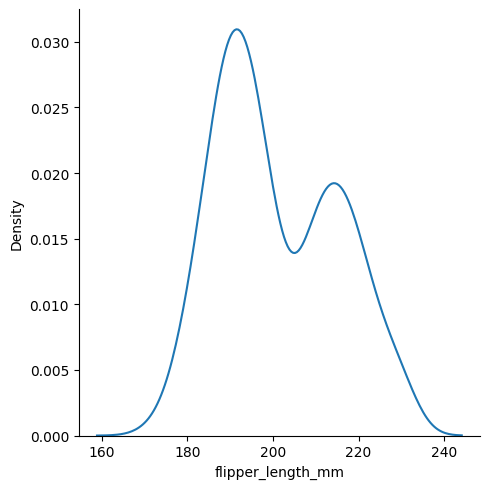

In [27]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

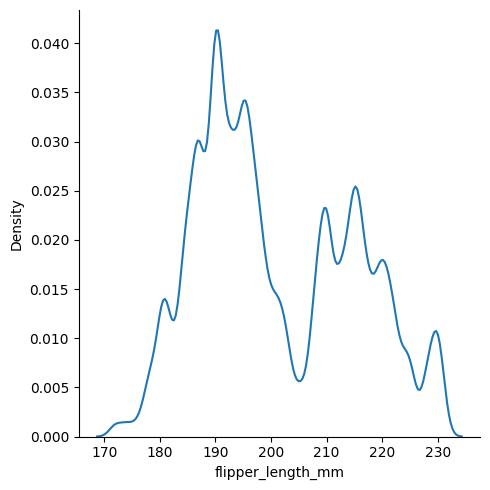

In [28]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

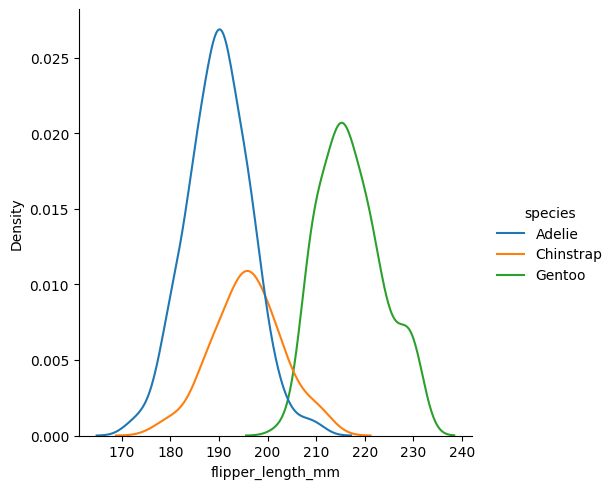

In [29]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

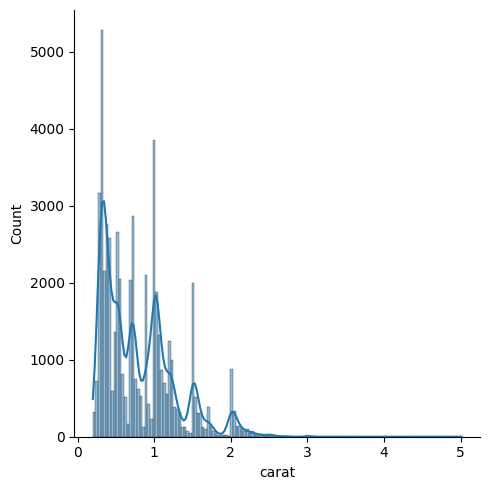

In [30]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kde=True)

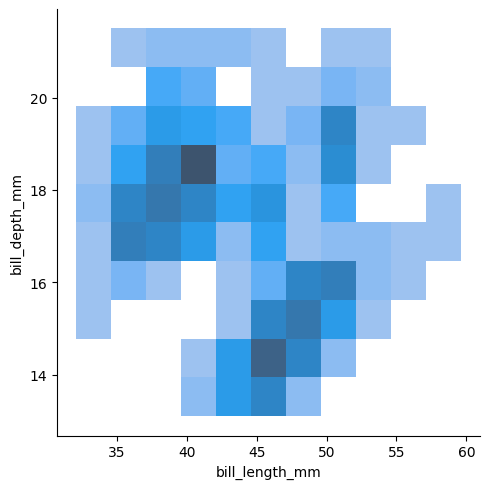

In [31]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

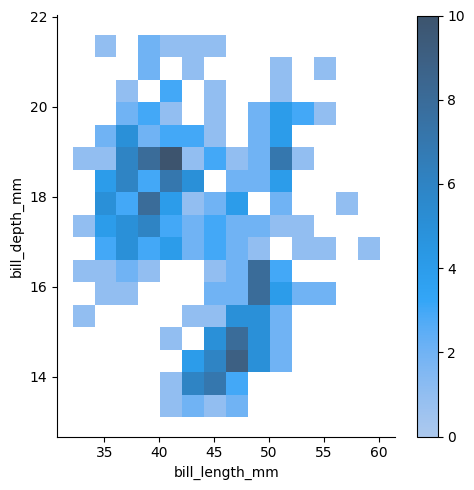

In [32]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

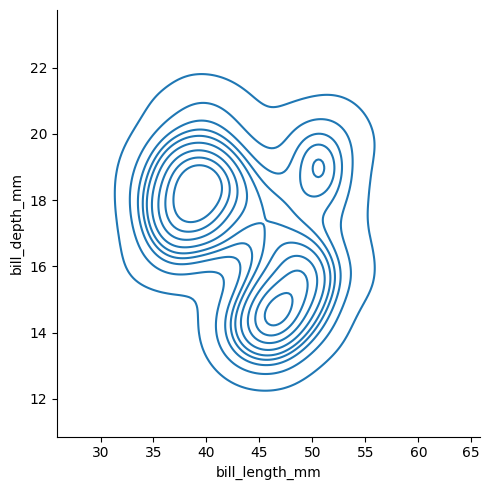

In [33]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

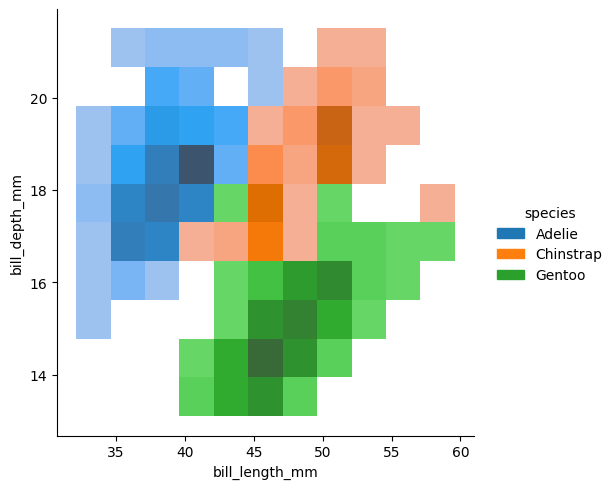

In [34]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

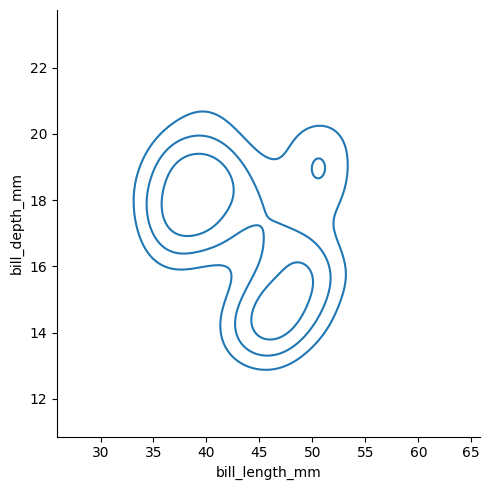

In [35]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

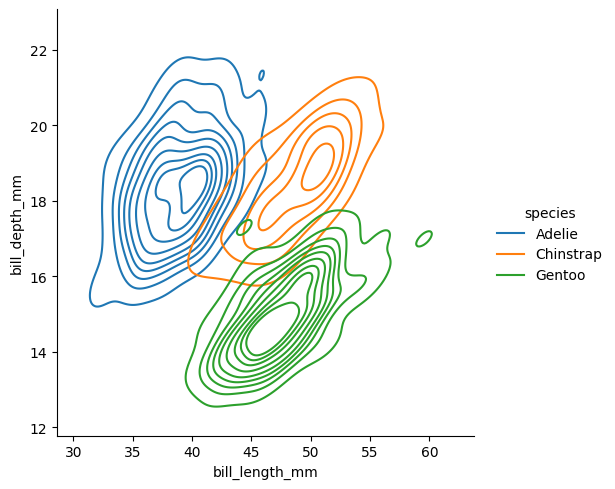

In [36]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

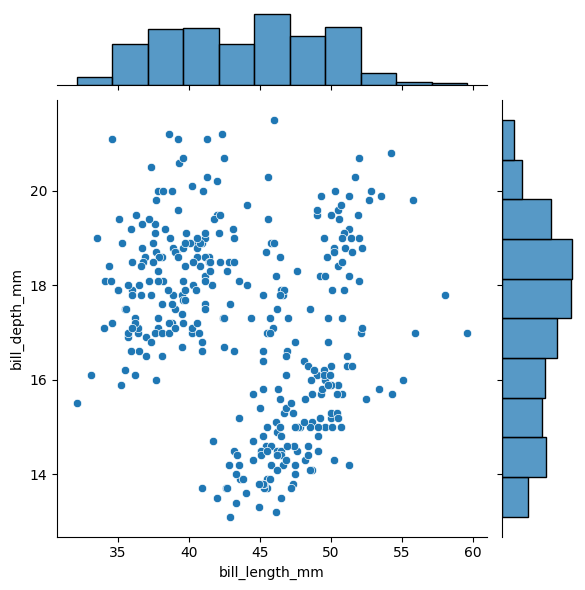

In [37]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

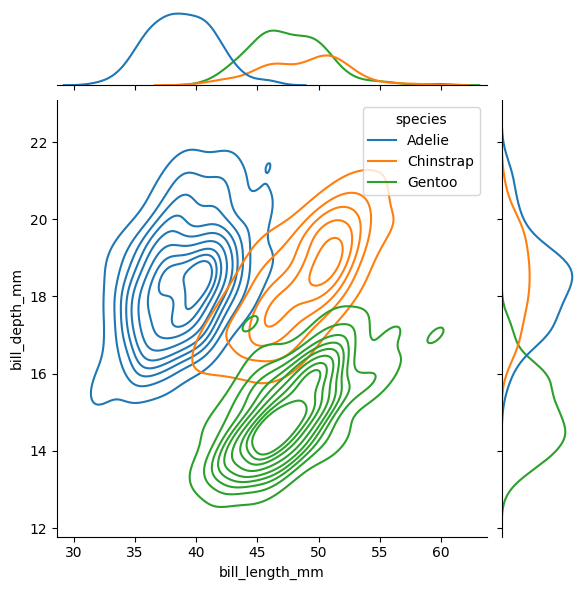

In [38]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

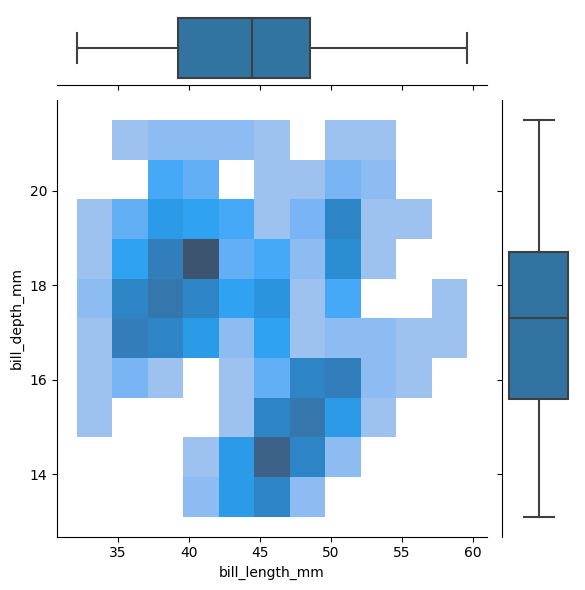

In [39]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

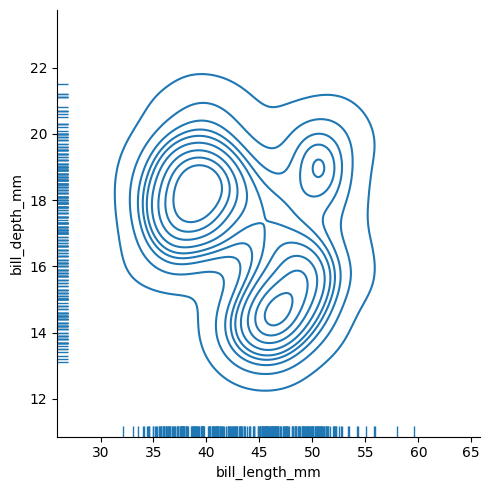

In [40]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

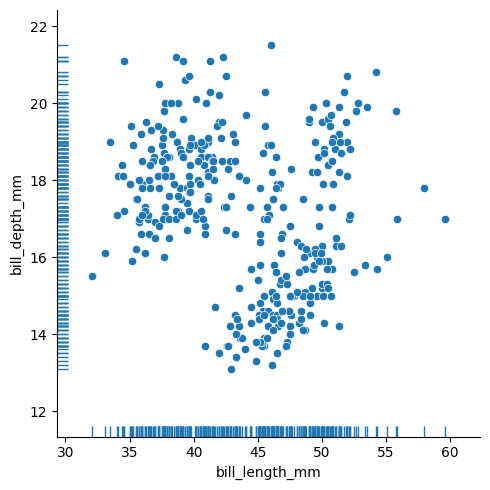

In [41]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

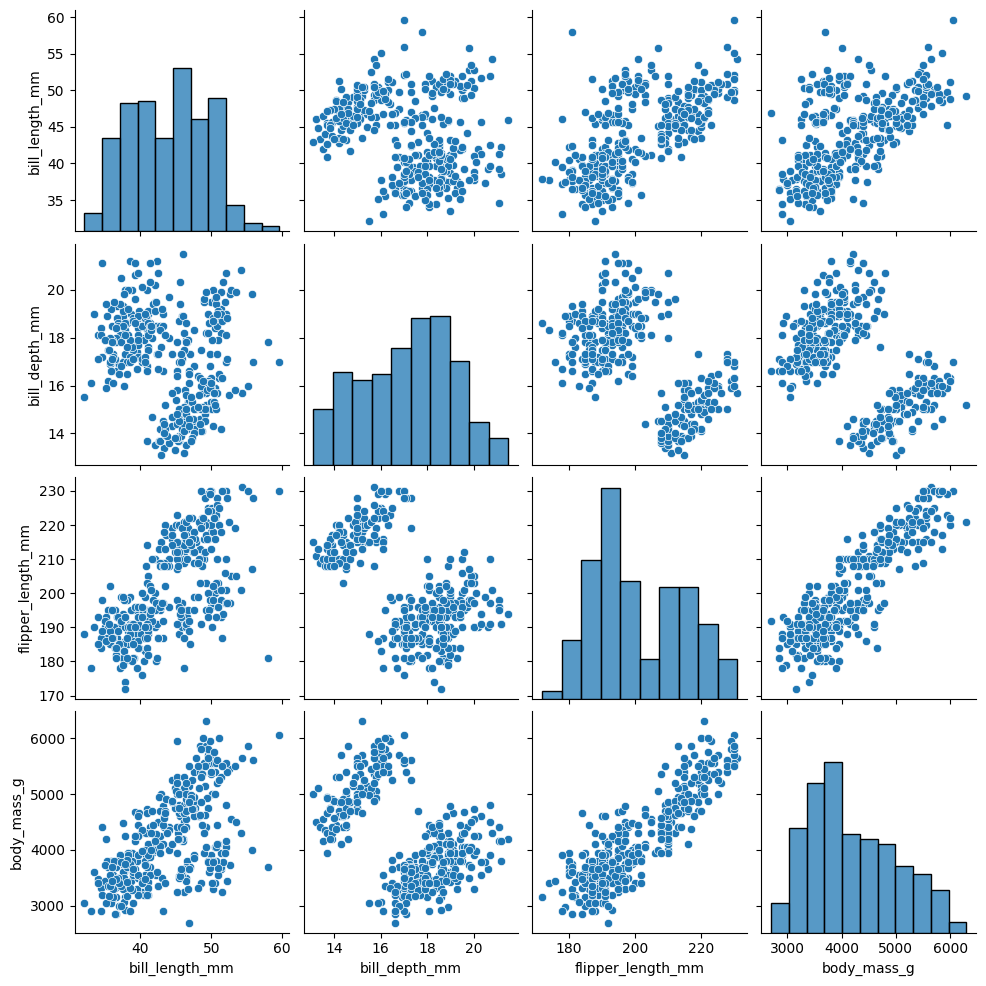

In [42]:
sns.pairplot(penguins)

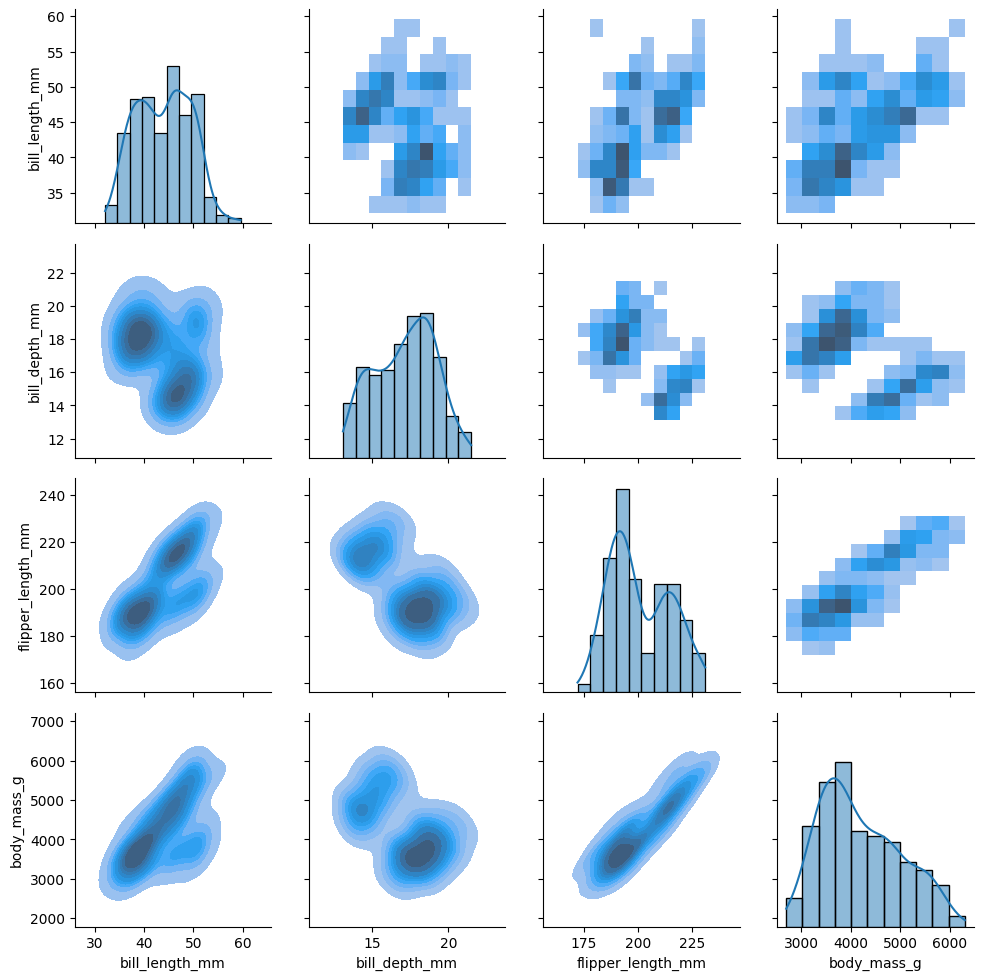

In [43]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

## 8. Multiple charts in the same figure

([<matplotlib.patches.Wedge at 0x7f690e932a10>,
 [Text(-0.12889029014495987, 1.0924226714538416, 'Adrian'),
  Text(-0.6228249215772513, -0.906691301966822, 'Monica'),
  Text(0.8274673515900017, -0.7247742973178813, 'Jared')],
 [Text(-0.07030379462452356, 0.5958669117020954, '53.7%'),
  Text(-0.33972268449668247, -0.49455889198190284, '23.4%'),
  Text(0.4513458281400009, -0.3953314349006625, '22.9%')])

Text(0.5, 1.0, 'Pie Chart (Subplot 1)')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Bar Chart (Subplot 2)')

Text(0.5, 0, 'Candidate')

Text(0, 0.5, 'Votes')

Text(0.5, 0.98, 'Voting Results')

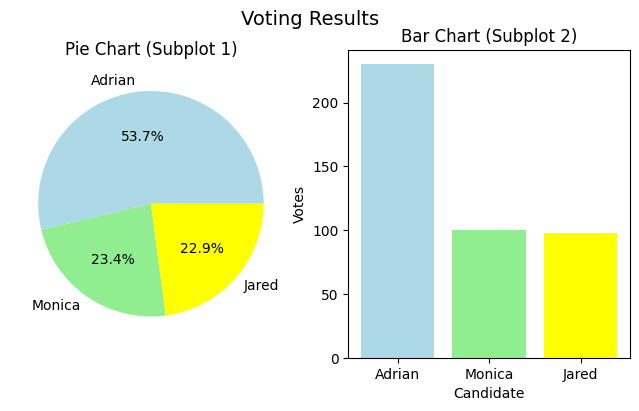

In [44]:
# Split the figure into 2 subplots
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121) # 121 means split into 1 row, 2 cols, and put in the 1st part
ax2 = fig.add_subplot(122) # 121 means split into 1 row, 2 cols, and put in the 2nd part

#first subplot
labels = ['Adrian','Monica','Jared']
num = [230, 100, 98]
ax1.pie(num, labels=labels, autopct='%1.1f%%', colors=['lightblue','lightgreen','yellow'])
ax1.set_title('Pie Chart (Subplot 1)')

#second subplot
plt.bar(labels, num, color=['lightblue','lightgreen','yellow'])
ax2.set_title('Bar Chart (Subplot 2)')
ax2.set_xlabel('Candidate')
ax2.set_ylabel('Votes')
fig.suptitle('Voting Results', size=14)

## 9. Exercise 69 (3-D plots)

Text(0.5, 0.92, 'Demo of 3D Plot')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0, 'Z')

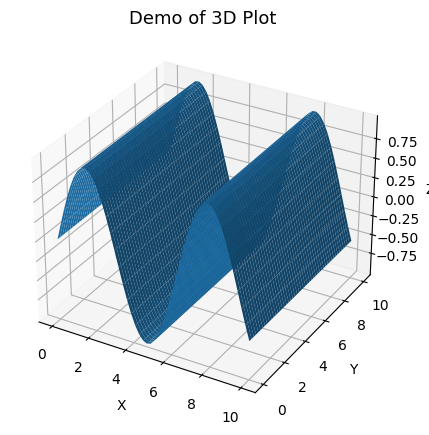

In [45]:
from mpl_toolkits.mplot3d import Axes3D
X = np.linspace(0, 10, 50)
Y = np.linspace(0, 10, 50)
X, Y = np.meshgrid(X, Y)
Z = (np.sin(X))

# Setup axis
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

# Add title and axes labels
ax.set_title("Demo of 3D Plot", size=13)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

For other fascinating 3-D plots available in matplotlib, visit https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html.

## 10. Dos and don'ts of data visualization

This section contains material from various sources: The Python Workshop textbook, this article: https://towardsdatascience.com/the-psychology-behind-data-visualization-techniques-68ef12865720, and my own notes.  Most of the good stuff comes from the first two resources, so please read them for more details.

**General idea:** Remove as many barriers as possible between the story you want to tell and the audience to which you are addressing.  These barriers can take on many different forms, some of which will be addressed in what follows.

### 10.1 Design principles

**Design for the audience**

General audience considerations:
 - Language, knowledge, skills, expectation
 - Broad cultural representations and conventions
 - Discipline based conventions and preferences
 
Individual specific limitations and abilities
 - Visual acuity
 - Color blindness
 - Document accessibility regulations (https://www.epa.gov/accessibility/what-section-508)

Types of blindness in people with vision
 - Color blindness
 - Inattentional blindness
 - Change blindness

**Design for the task**

Discovery and hypothesis generation
 - Comparative views: let the data speak, avoid confirmation bias
 - Alternative views: Change context, scale and visual perspective
 - Interactive views: sliders, dropdowns, filters
 
Analysis
 - Inferential graphics: hypothesis tests, error rate control confidence levels, ROC curves
 - Model graphics: structure, comparisons, residuals, criticism
 
Decision Making
 - Actionable graphics
 
Communication, teaching, learning
 - Summaries
 - Visual stories and explanations
 - Establish the problem, elaborate, and resolve
 - Verbal presentations with a single picture
 

 
 

### 10.2 Human perception and cognition

**Are people better at processing visual information than they are at processing verbal information?**

In short, yes.  Based on research about the speed of processing input from your various senses (https://wiredcraft.com/blog/data-visualizations-images/), sight is the **strongest sense** with respect to processing speed, and is comparable to bandwidth of a computer network (1250 MB/s).  

- Compared to the next strongest sense (touch), sight is 10 times faster.   

Wait, but why? Enter psychology.

**Cognition** is handled by the **cerebral cortex**, which is a tool of reasoning; it is a sophisticated tool, but it’s pretty slow. It requires more effort to process information. **Raw visual information** is processed by the **thalamus**, a much older part of the brain than the cerebral cortex. It takes only a few hundred milliseconds to process visual stimuli (much faster than we process text or numbers). **So, processing visual data is faster, and it reduces the cognitive load.** We’re not aware of the amount of data and the speed with which we process visual information. It’s subconscious. This phenomenon is known as **“pre-attentive processing”**.

“Pre-attentive processing is the subconscious accumulation of information from the environment. All available information is pre-attentively processed. Then, the brain filters and processes what’s important. Information that has the highest salience (a stimulus that stands out the most) or relevance to what a person is thinking about is selected for further and more complete analysis by conscious (attentive) processing.” — from Wikipedia.

**Structuring input**
 - We continuously structure our sensory input on different scales.  This comes from **Gestalt theory**, which is the idea that the human brain will make sense of complex images consisting of various elements by subconsciously organizing the parts of the images into an organized system. Even if the parts are just pure unrelated collections of objects.
 - Many times we are unaware of this structuring.  For example, the blood supply of the retina is located in front of the retina, which means that light passes through the blood supply on its way to the photodetectors on the retina. We don't see the retinal blood supply because it doesn't change, and our eyes ignore unchanging images.
 - The mind is not a camera that stores everything we see exactly (remember - things get structured).

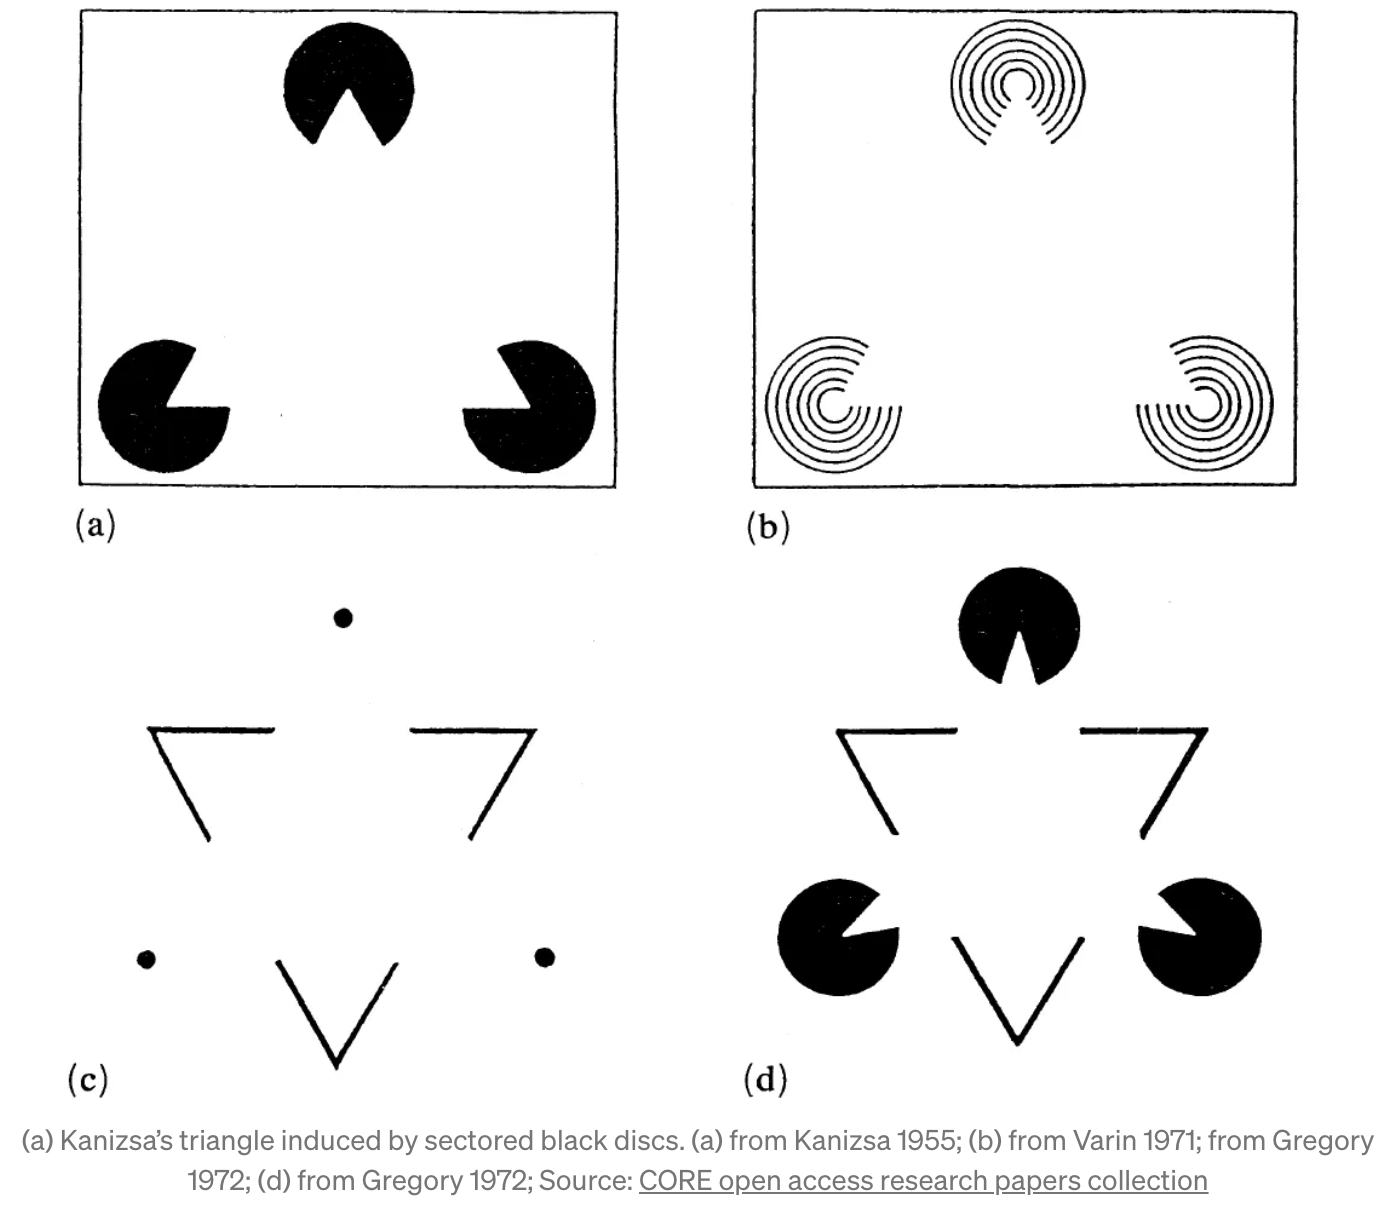

A human eye sees a **triangle** rather than circles, angles and dots. These images illustrates how our brains strive to fill in the gaps and bring order to the world around us.

Gestalt principles can aid data visualization, but they can also break it. The principle sets might be slightly different depending on the source. Wikipedia outlines one set of principles, Scholarpedia outlines another, and some design website use others. Some sources list just five of the principles, while others can go up to ten. However, the following graphic outlines the most commonly used principles:

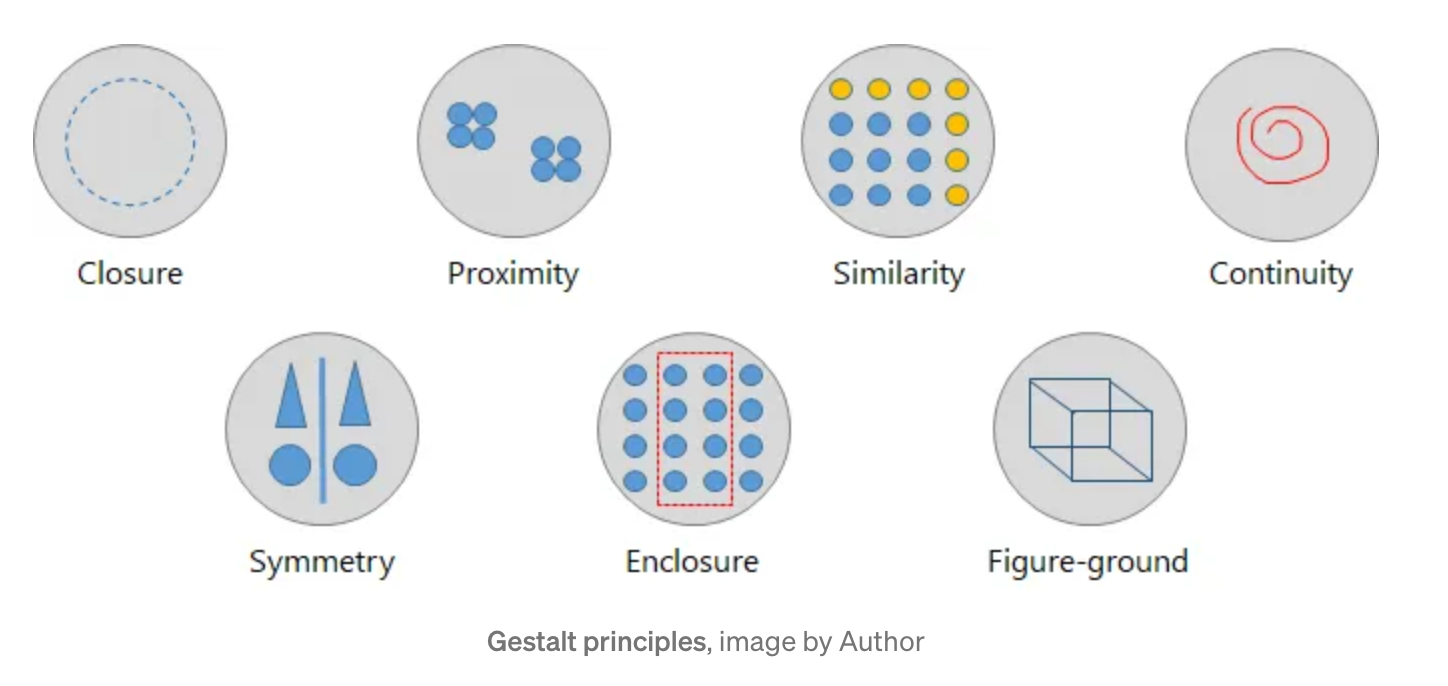

Let's see some of these principles in action. The following comes directly from https://towardsdatascience.com/the-psychology-behind-data-visualization-techniques-68ef12865720 with some helpful additions from my end.  All credit to the author of this article.

**1. Law of Proximity** states that people perceive visual elements related to how closely they are positioned to one another.

Recommendations to aid effective data visualization: Know what your visuals’ information priority is, and then create groupings through proximity to support that priority. Spatial proximity takes precedence over all other principles of grouping.

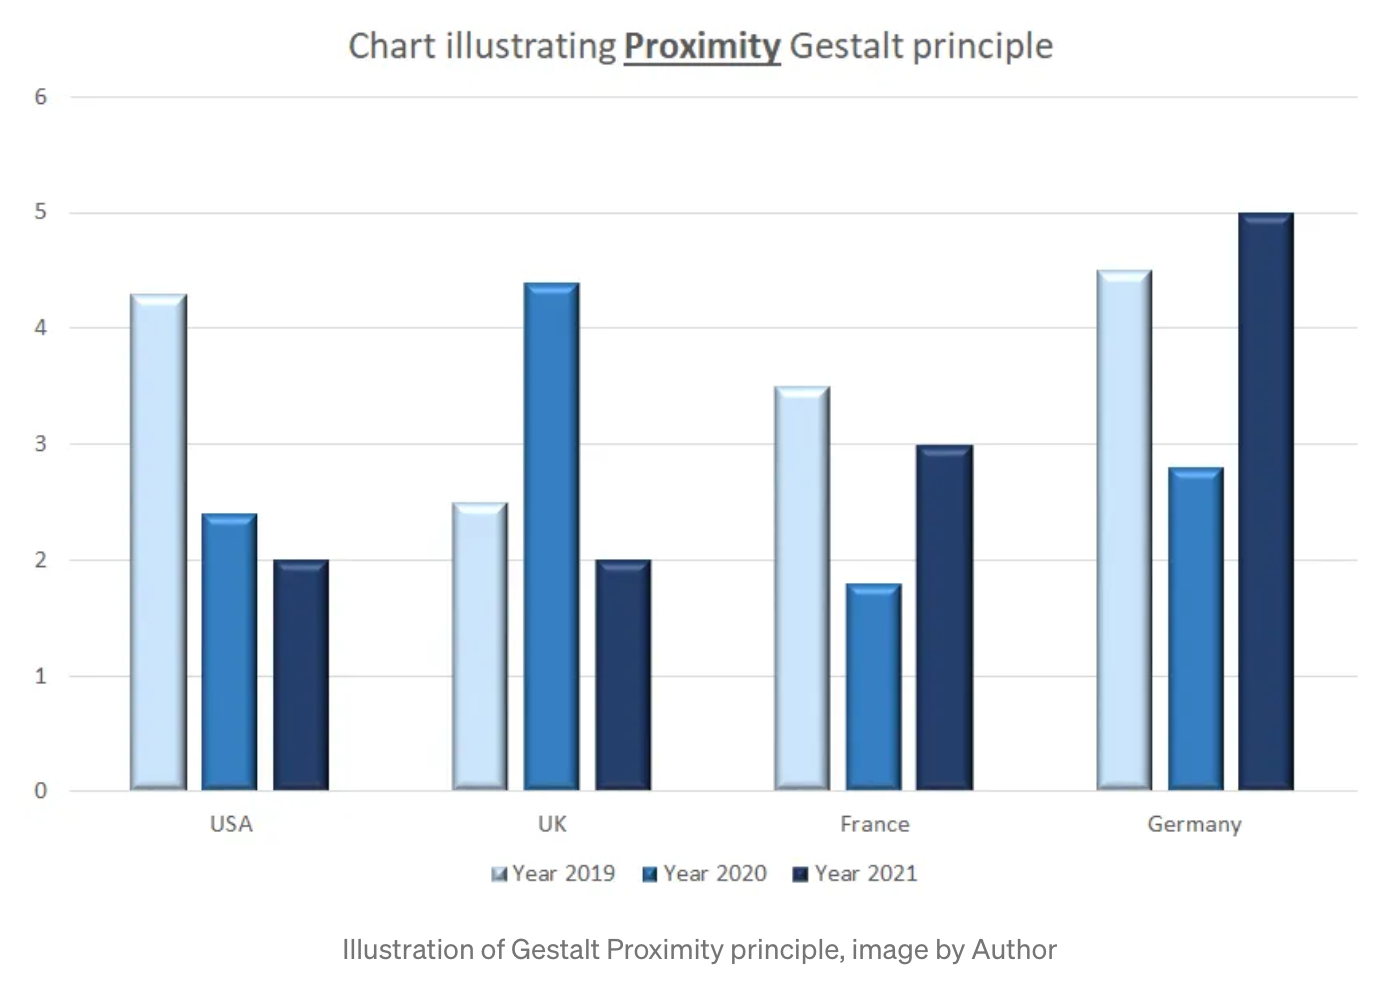

**Discussion**
 - What kinds of information is **easier** to obtain from this graph due to the use of grouping by country?
 - What kinds of information is **harder** to obtain from this graph due to the use of grouping by country?
 - In presenting this data, I can group by country or by year.  How can I go about making this decision?

**2. Law of Closure** states that when the human brain sees complex arrangements of visual elements, it organizes those elements into recognizable patterns. **We like to see as simple of a figure as possible.** In other words, when the human brain is confronted with an incomplete image, it will fill in the blanks to complete the image and make it make sense.

Recommendations to aid effective data visualization: This is cautionary advice; data scientists should be careful when showing graphs with breaks because the human mind tends to form complete shapes even if the shape is incomplete. An example of a bad application of this principle is shown below. There are some missing data in the series, and the plotting of the data reveals the gap. A human mind will readily close up the gap with a smooth line. However, the actual series looks far from smooth.

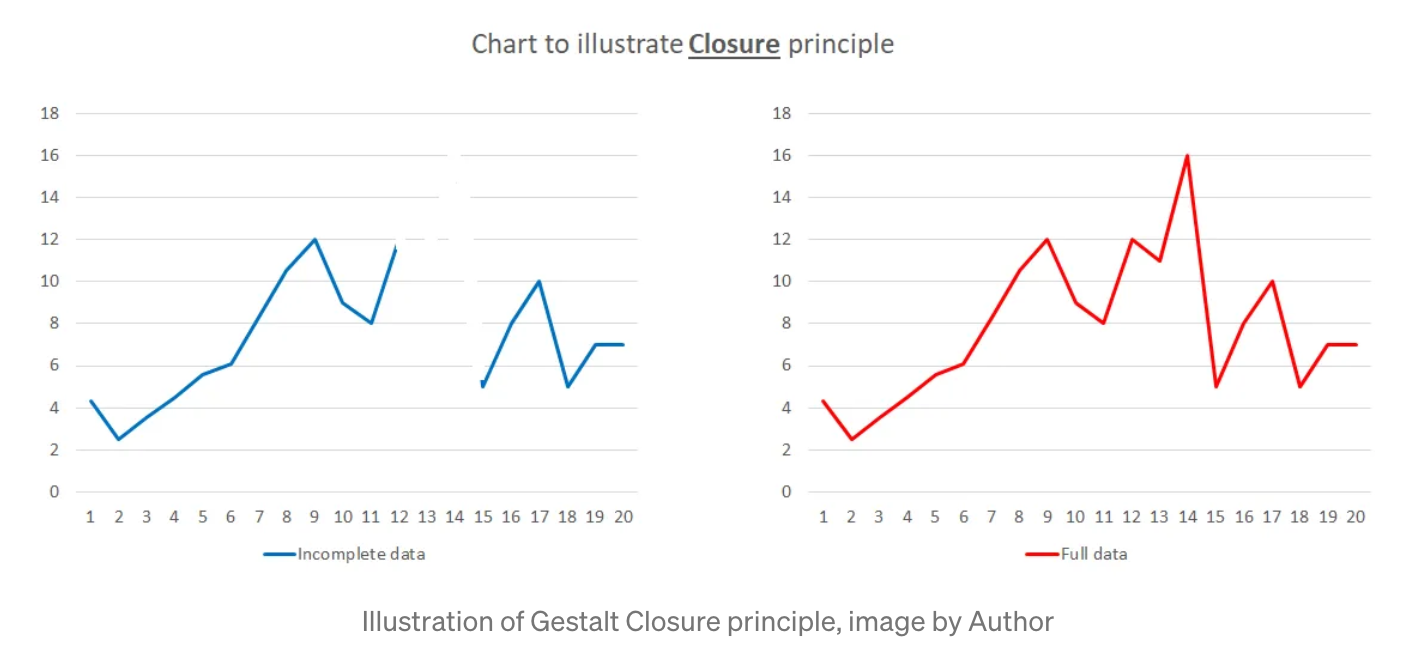

**Discussion**

- What could you do to help prevent your audience from drawing improper conclusions (smoothness) from the above graph with the missing data?

**3. Law of Similarity** states that the human brain will group together things that appear similar (it also tends to assign them the similar function). The brain perceives items that are similar colors, shapes, sizes, or orientations as belonging to the same groups as like items. 

Recommendations to aid effective data visualization: Use colors, shape, or size to group visual objects together to tell your story. The Similarity Principle can help your audience more readily identify which groups the displayed data belong with. 

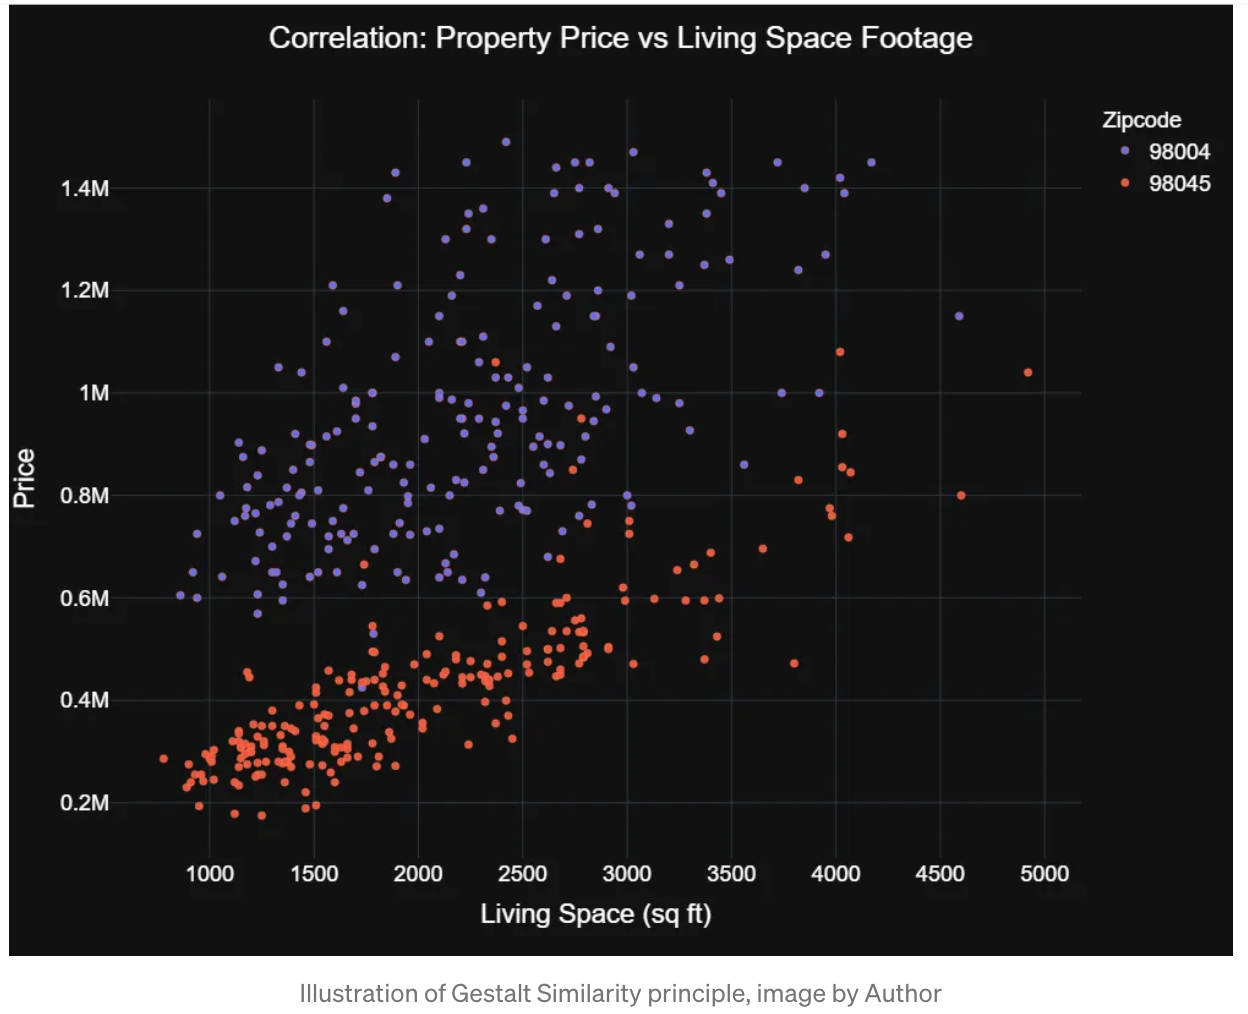

Go to https://towardsdatascience.com/the-psychology-behind-data-visualization-techniques-68ef12865720 for more.

### 10.3 Weber's Law of Just Noticeable Differences

**Just noticeable differences and the probability of detection**

 - Related to the ratios of stimuli magnitudes
 - Difference detection is more likely when ratios are further from 1
 
**Which line is longer?**
 
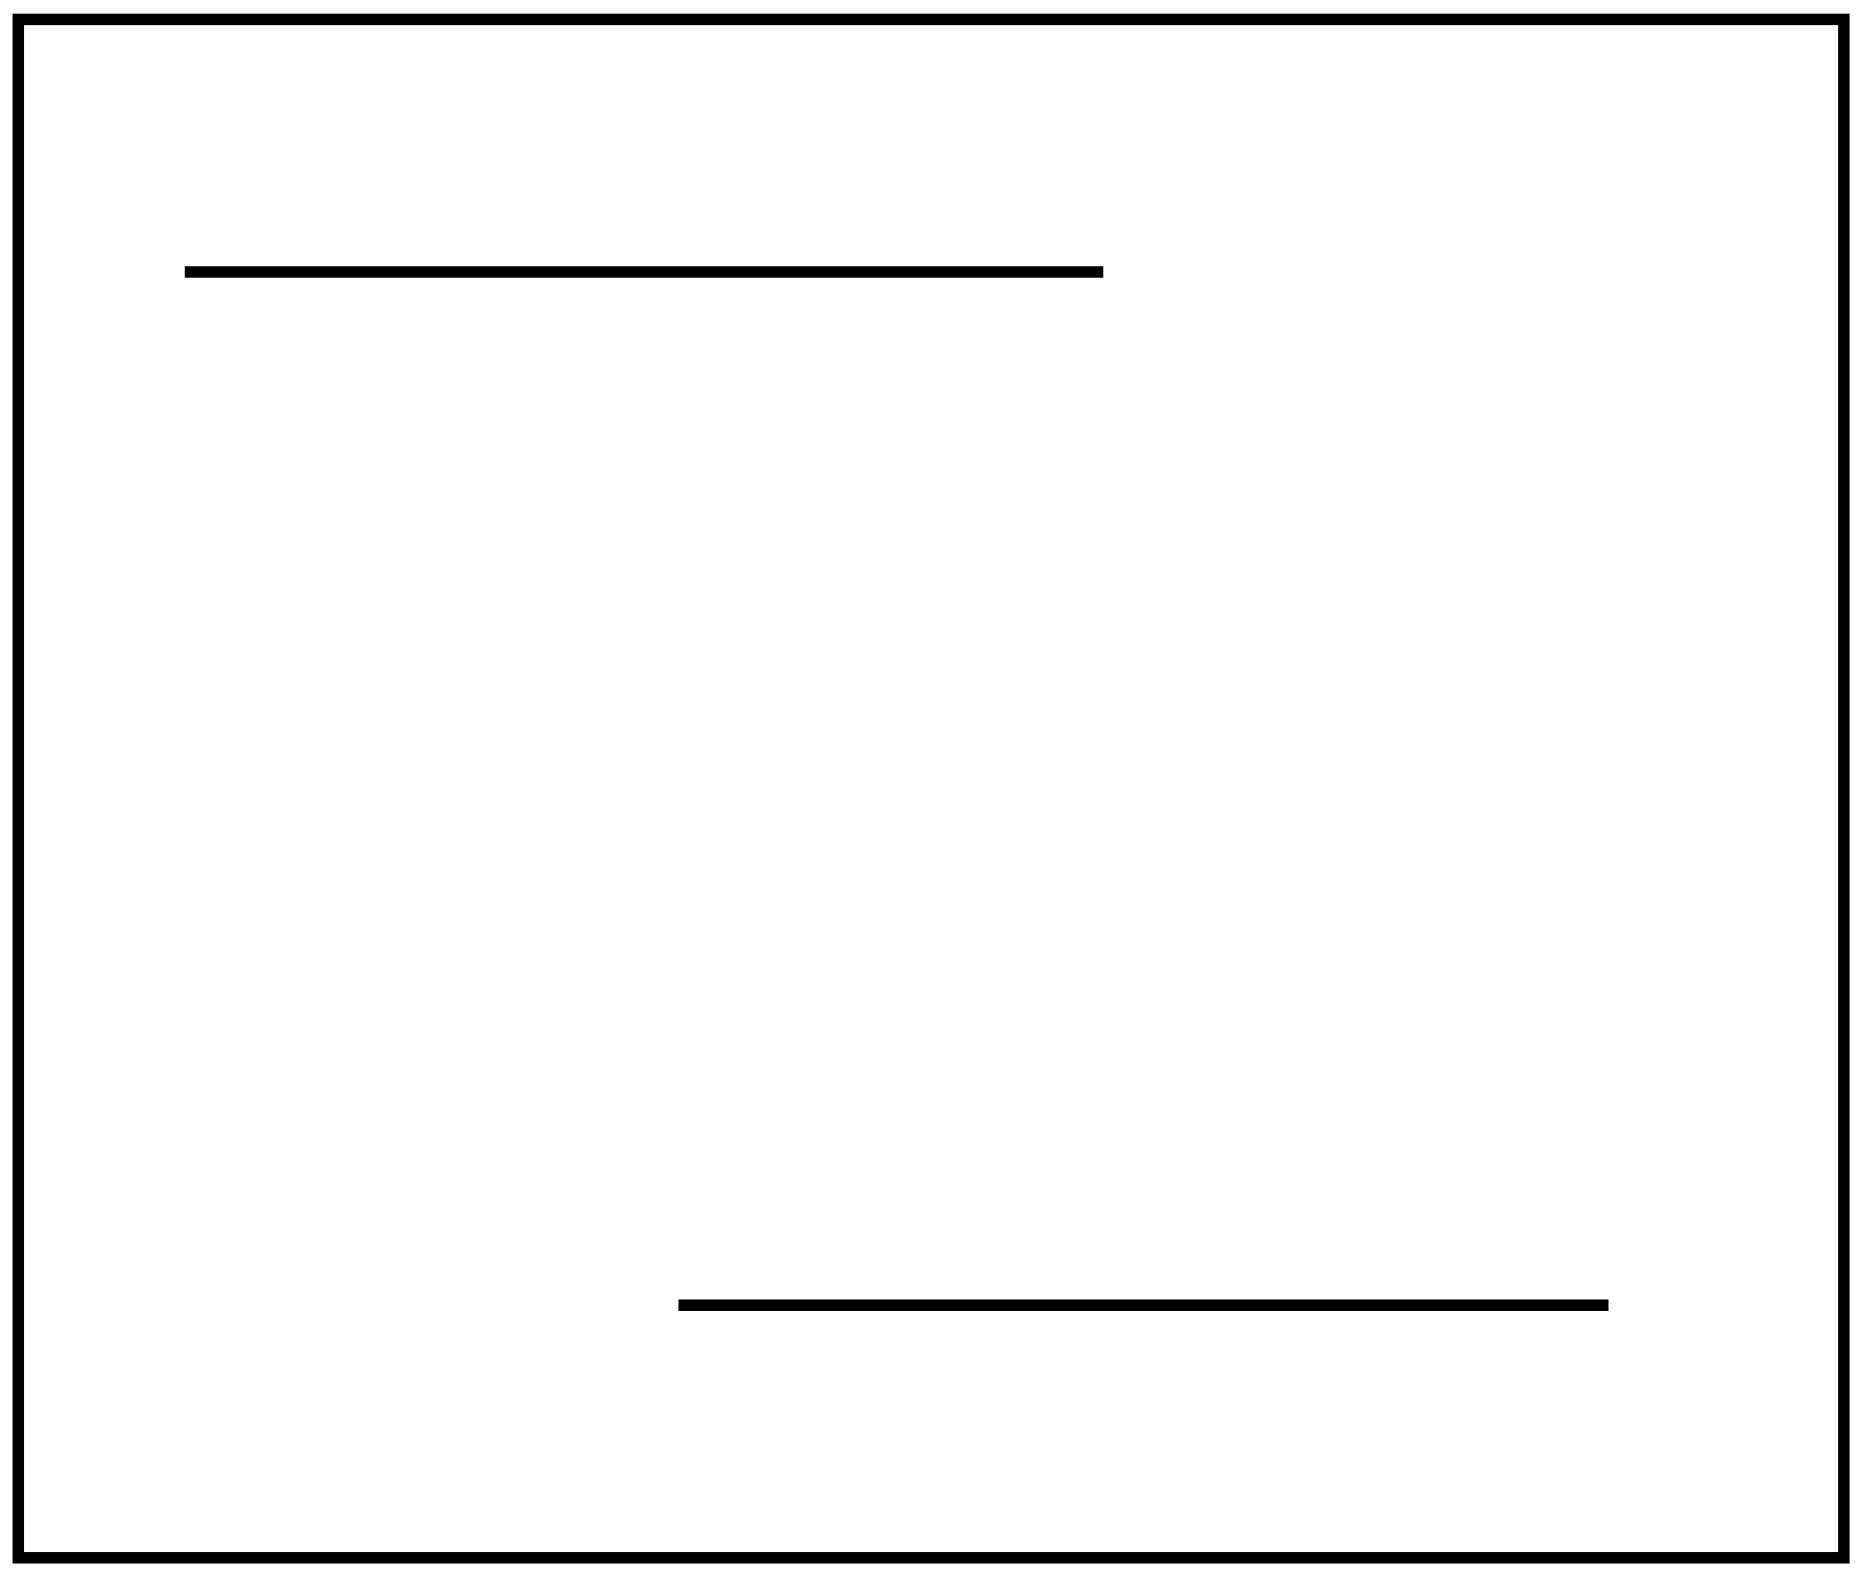

Line lengths have a ratio of 1.02.  

How about now.  Which line is longer?

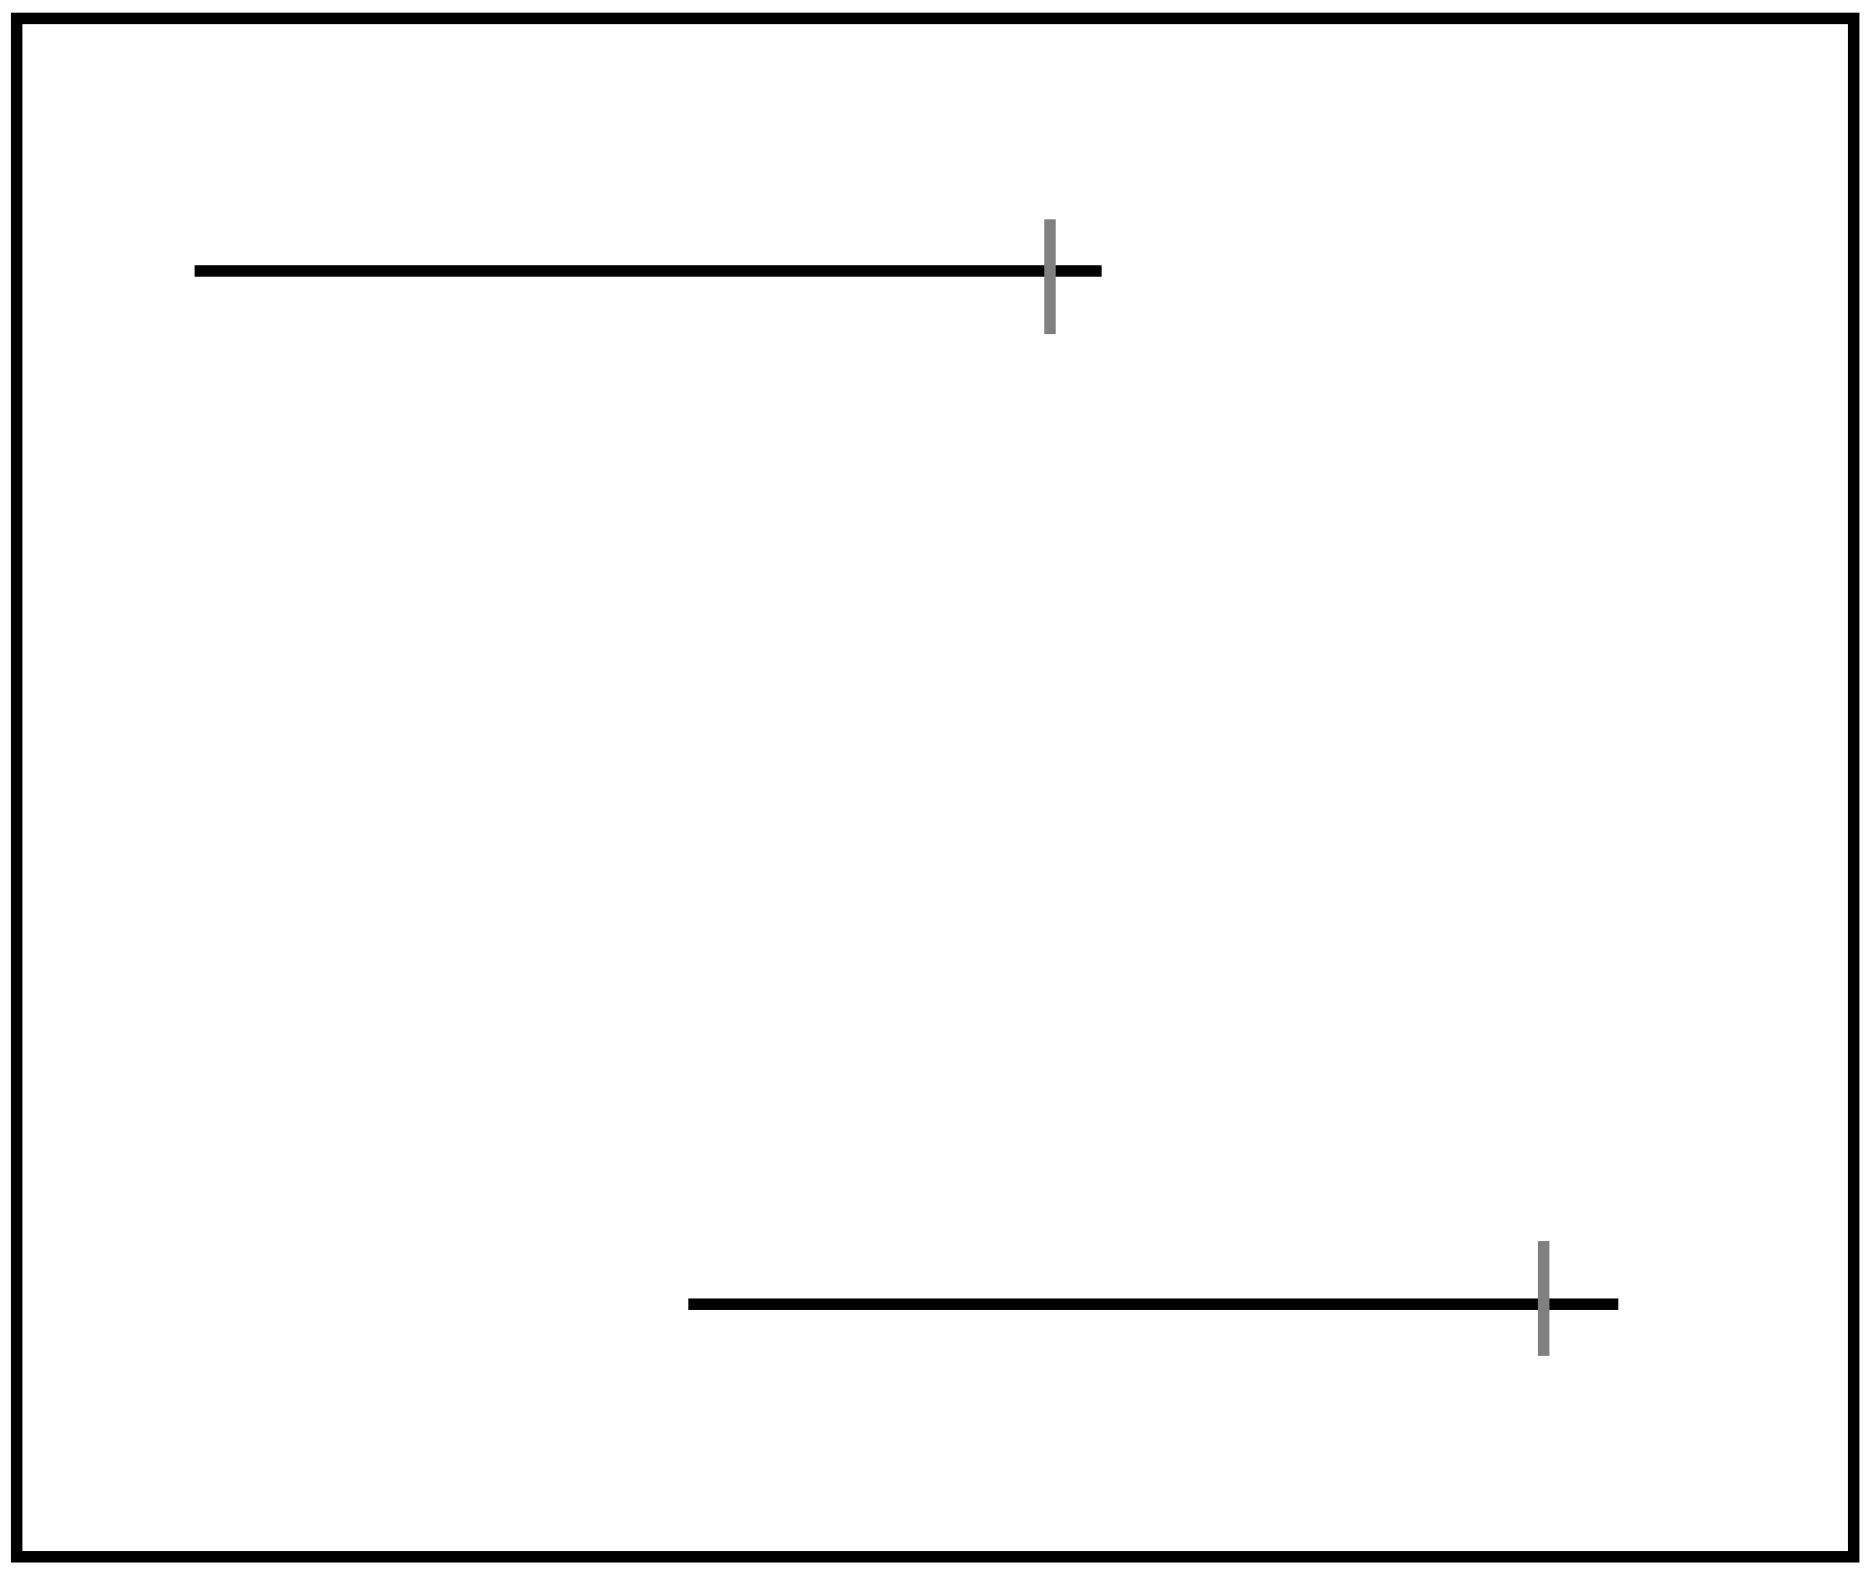

Using the marker of equal lengths, our eyes can focus in on the line lengths after the marker.  This increases the ratio of the line lengths after the marker, which makes it easier to detect the difference.

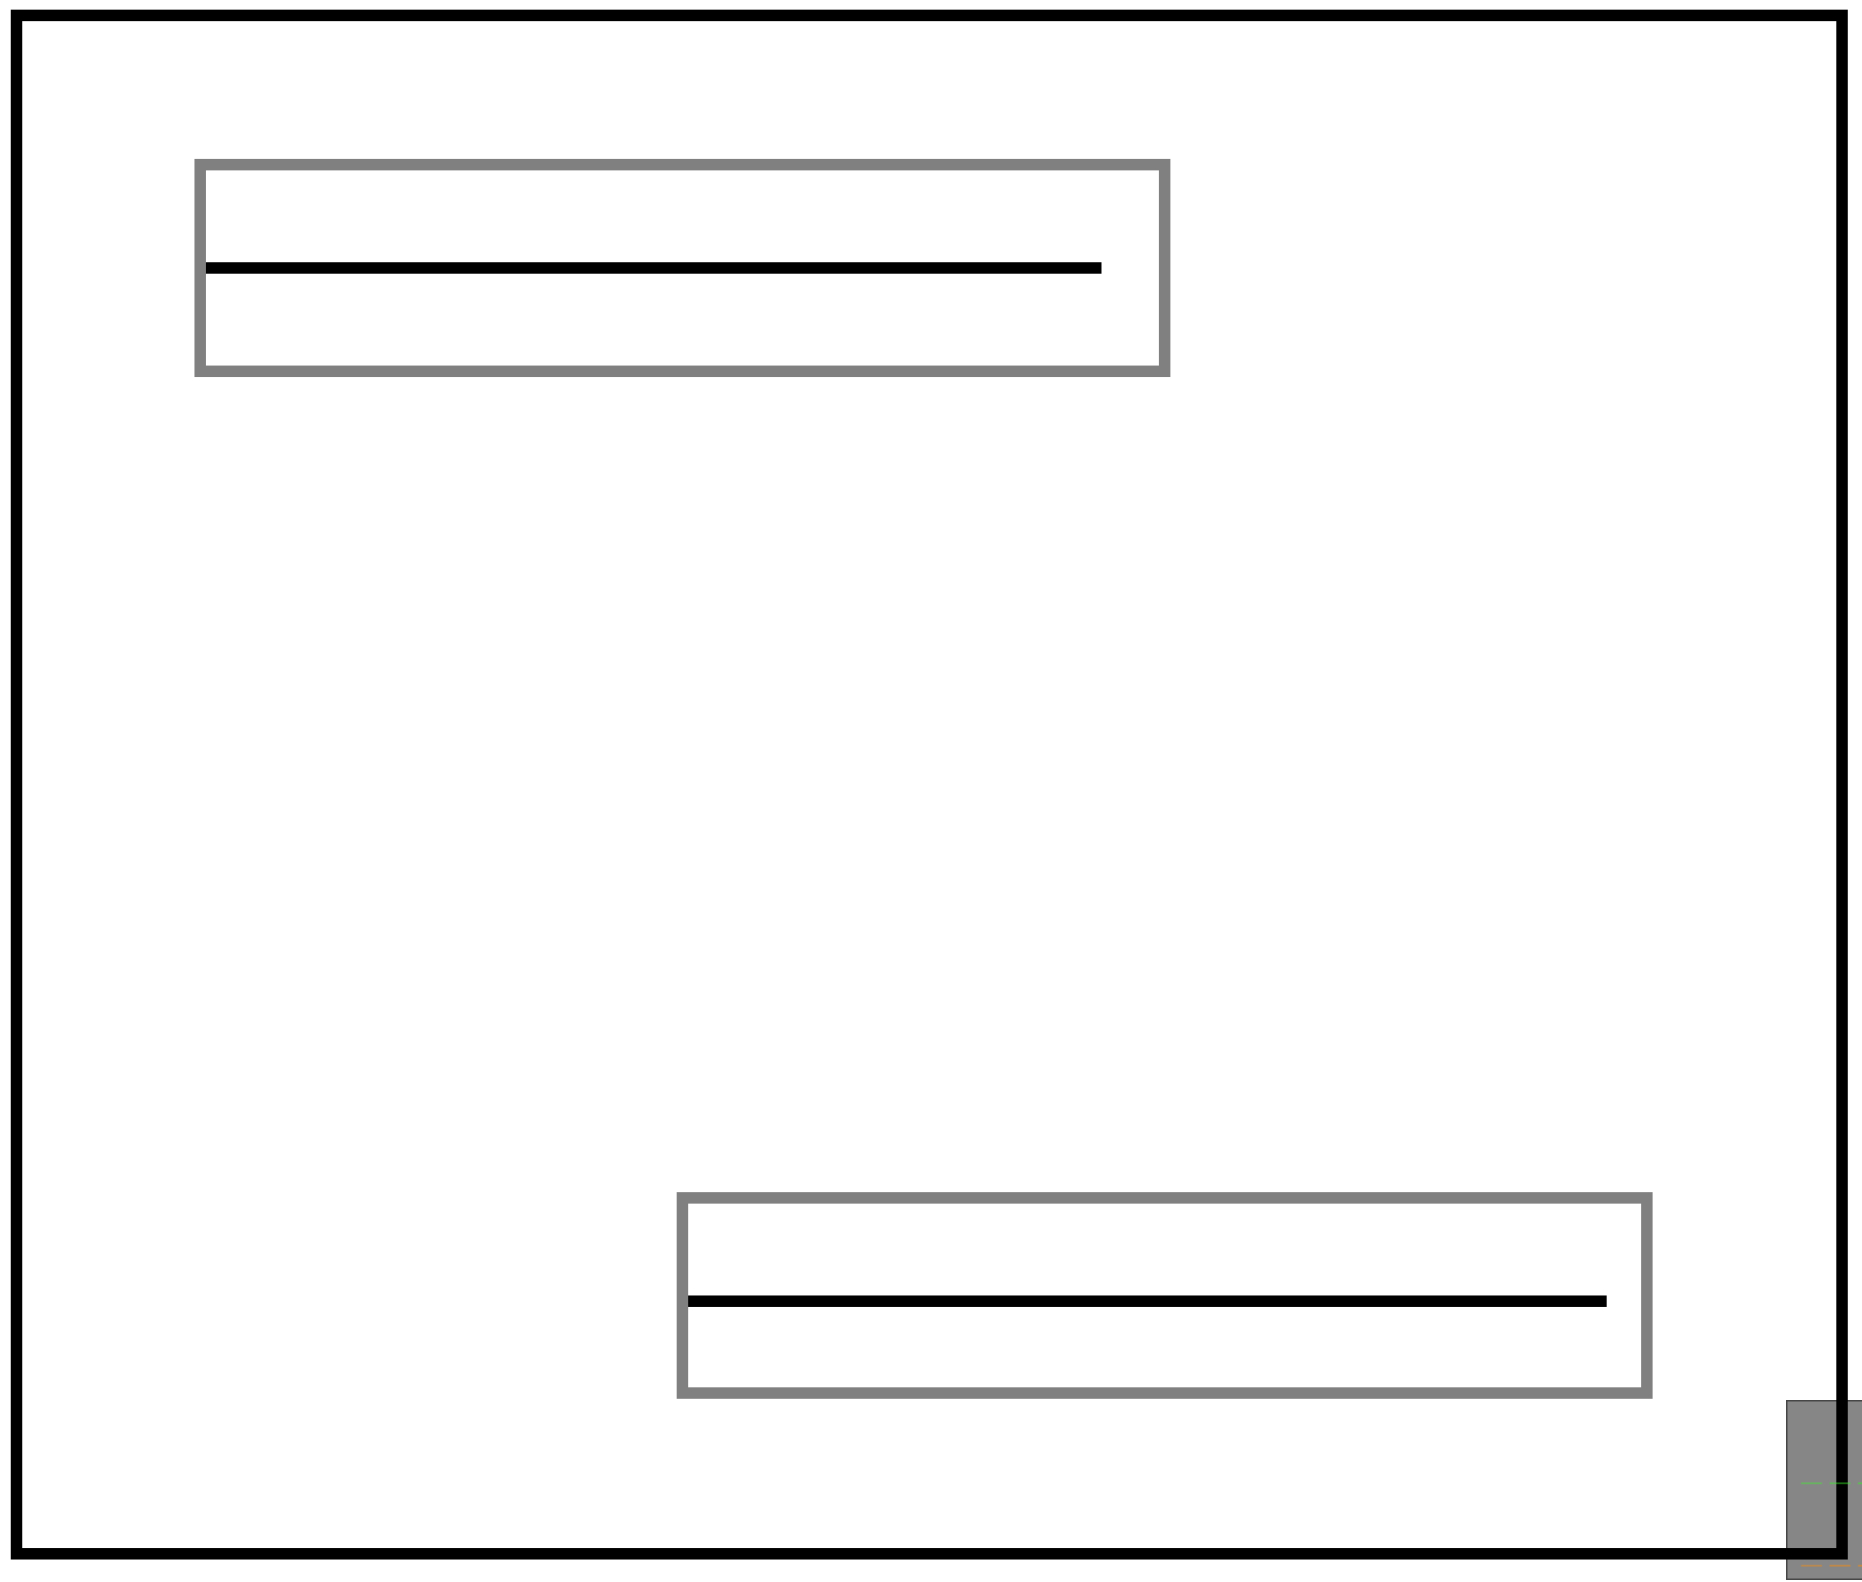

Same idea with the equal sized boxes.  

**Grid lines** take advantage of this idea to help with comparisons between patterns. Consider comparing the x and y location of x and y minima without and with background grid lines.  Which of the below graphs has a smaller minima?

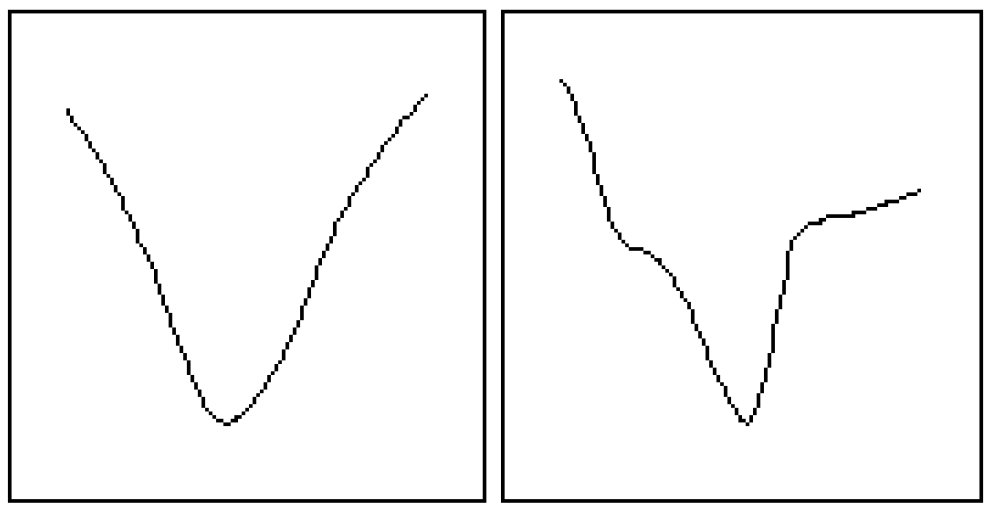

How about now.

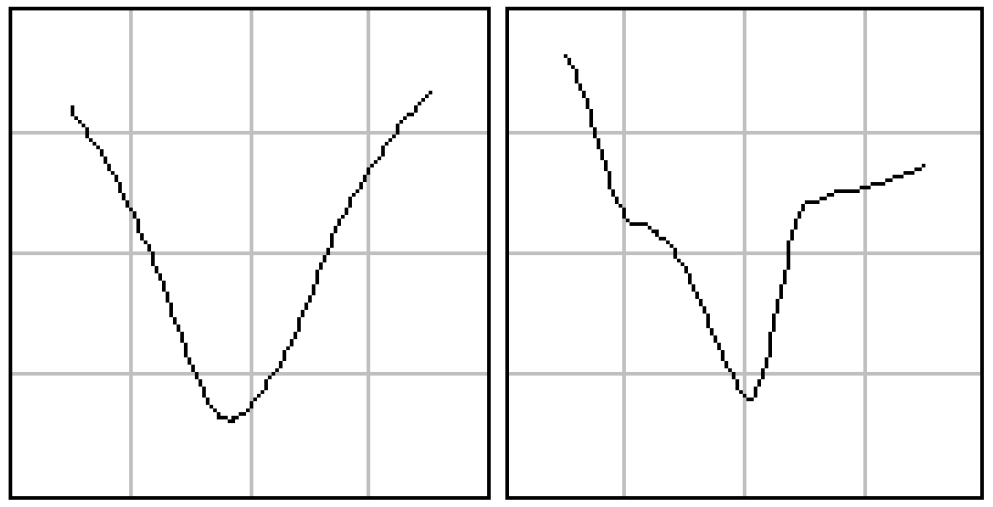

Easier right?  Thank you grid lines!

### 10.4 Perceptual accuracy of extraction for continuous variable encodings (Cleveland and McGill, 1984)

1. Position along a scale (best)
2. Position along non-aligned scales
3. Length, direction, angle
4. Area
5. Volume
6. Shading (worse)

Example 1:

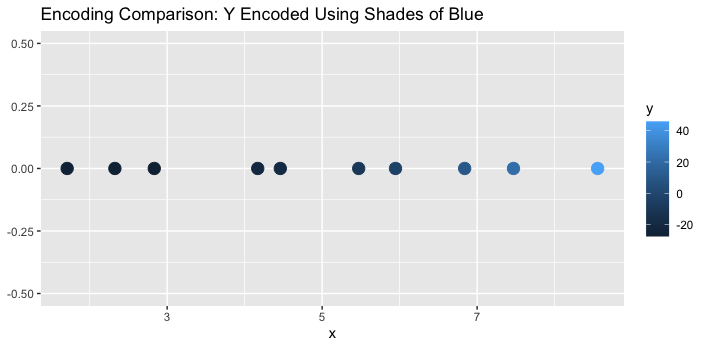

**Question:** What is the difference in the y-values between the point located at x=6 and the point located at x=3?

Example 2:

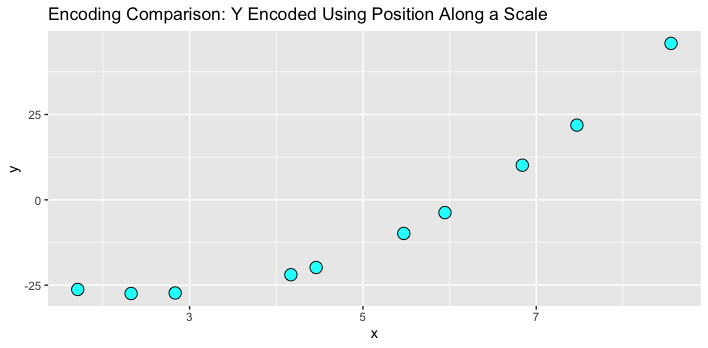

**Same question:** What is the difference in the y-values between the point located at x=6 and the point located at x=3?

Easier to answer using the second encoding, right?  What is the point?  The visual encoding used can impact the audience's ability to answer certain types of questions.  Think about the important kinds of questions you want the audience to be able to answer easily with your visualization, and use the right encodings to facilitate.  

### 10.5 Superimposition vs. juxtaposition

When our eyes 'jump' from one image to another, there is no input.  The old image fades in about 1/5 of a second. A smaller part of the image under scrutiny is retained longer, but then we are blind to changes elsewhere in the image. Comparing juxtaposed images requires back and forth scrutiny.  This is tiring. Consider the comparisons needed to tell the story you want the readers to understand and choose the image accordingly.

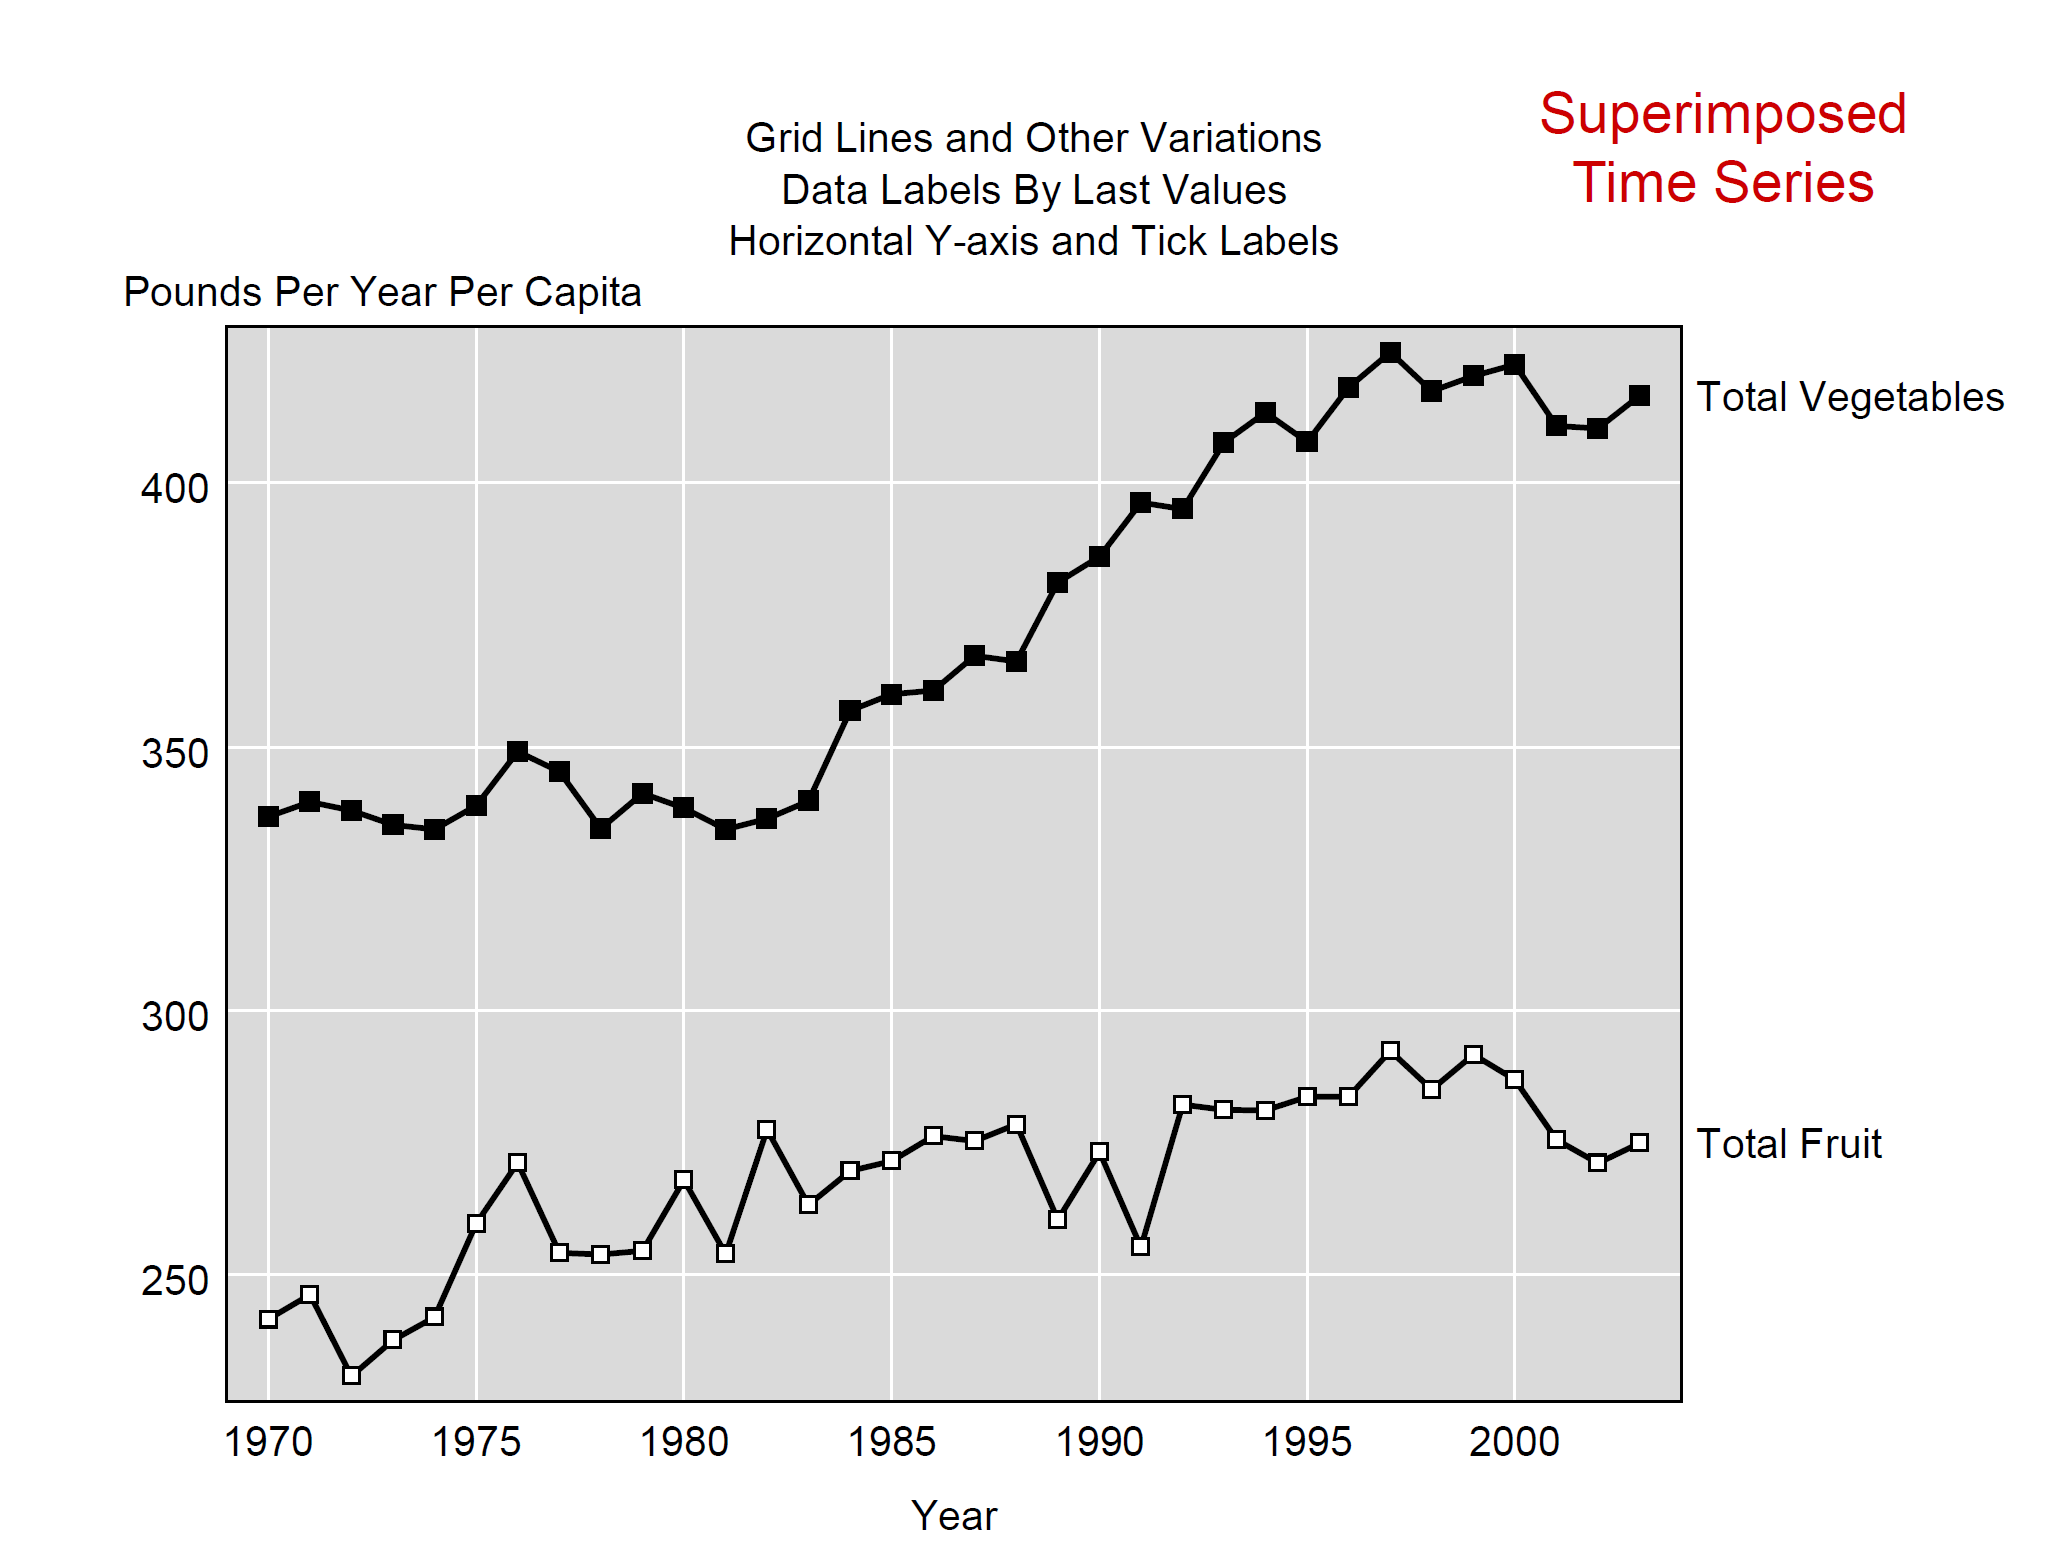

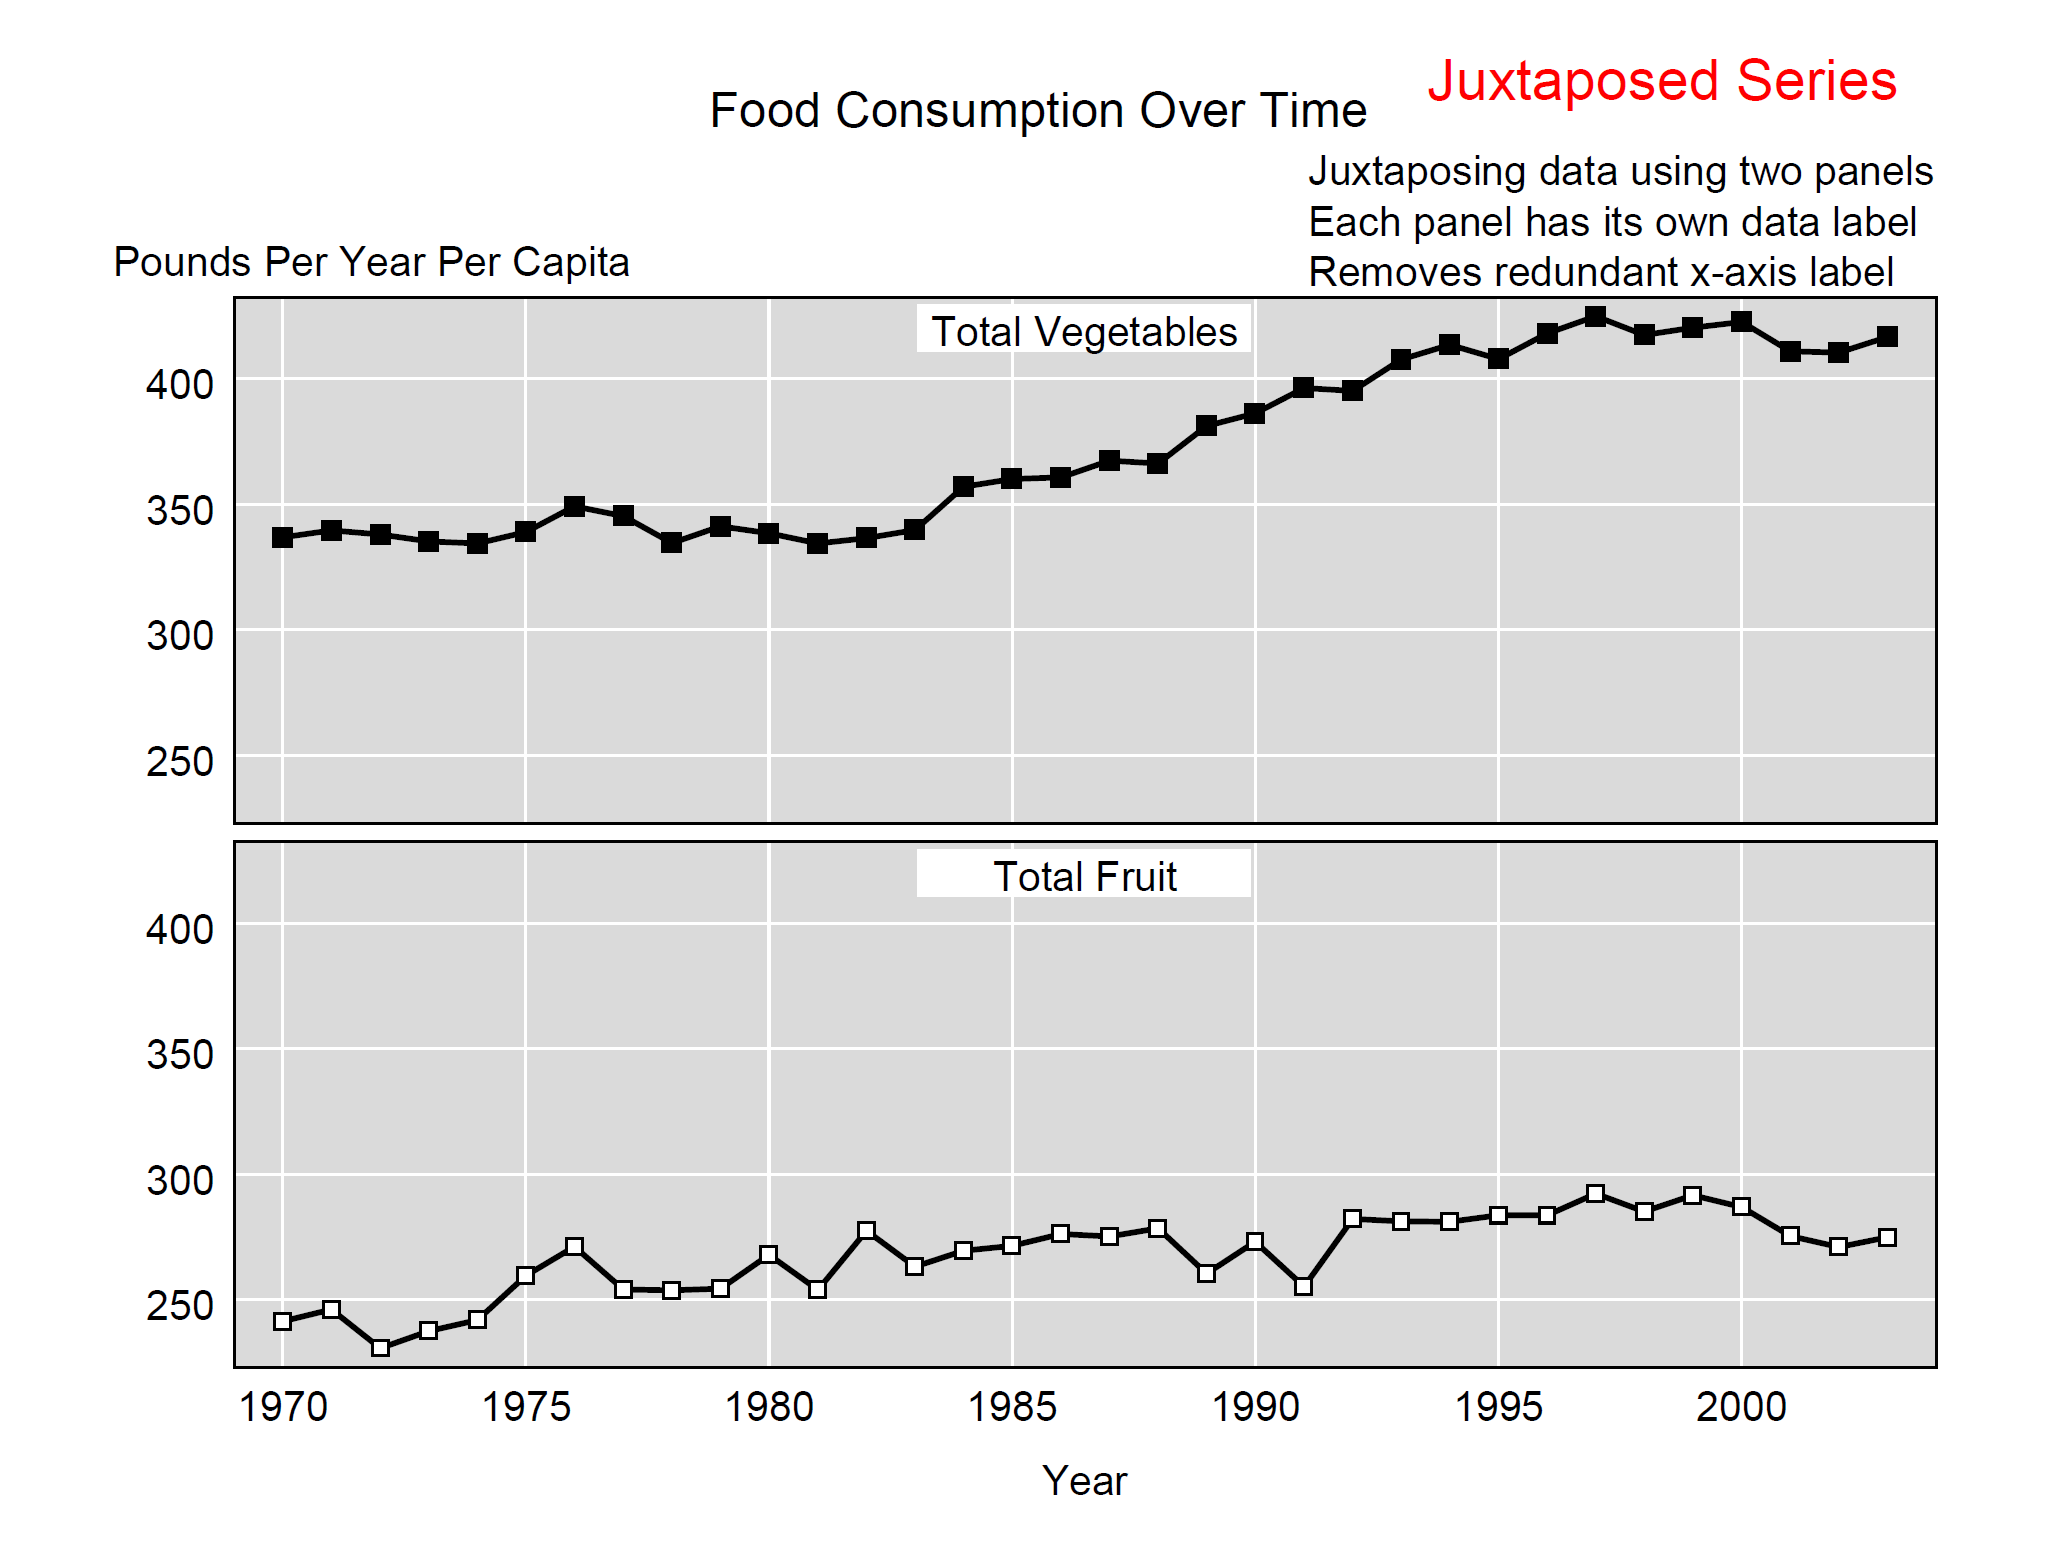

Rapid alternation of almost identical images is often used to find changes between almost identical photos.
Changes appear as blinking. Inserting a blank image between images emulates change blindness

## 10.6 Comparing curves (we don't do this well)

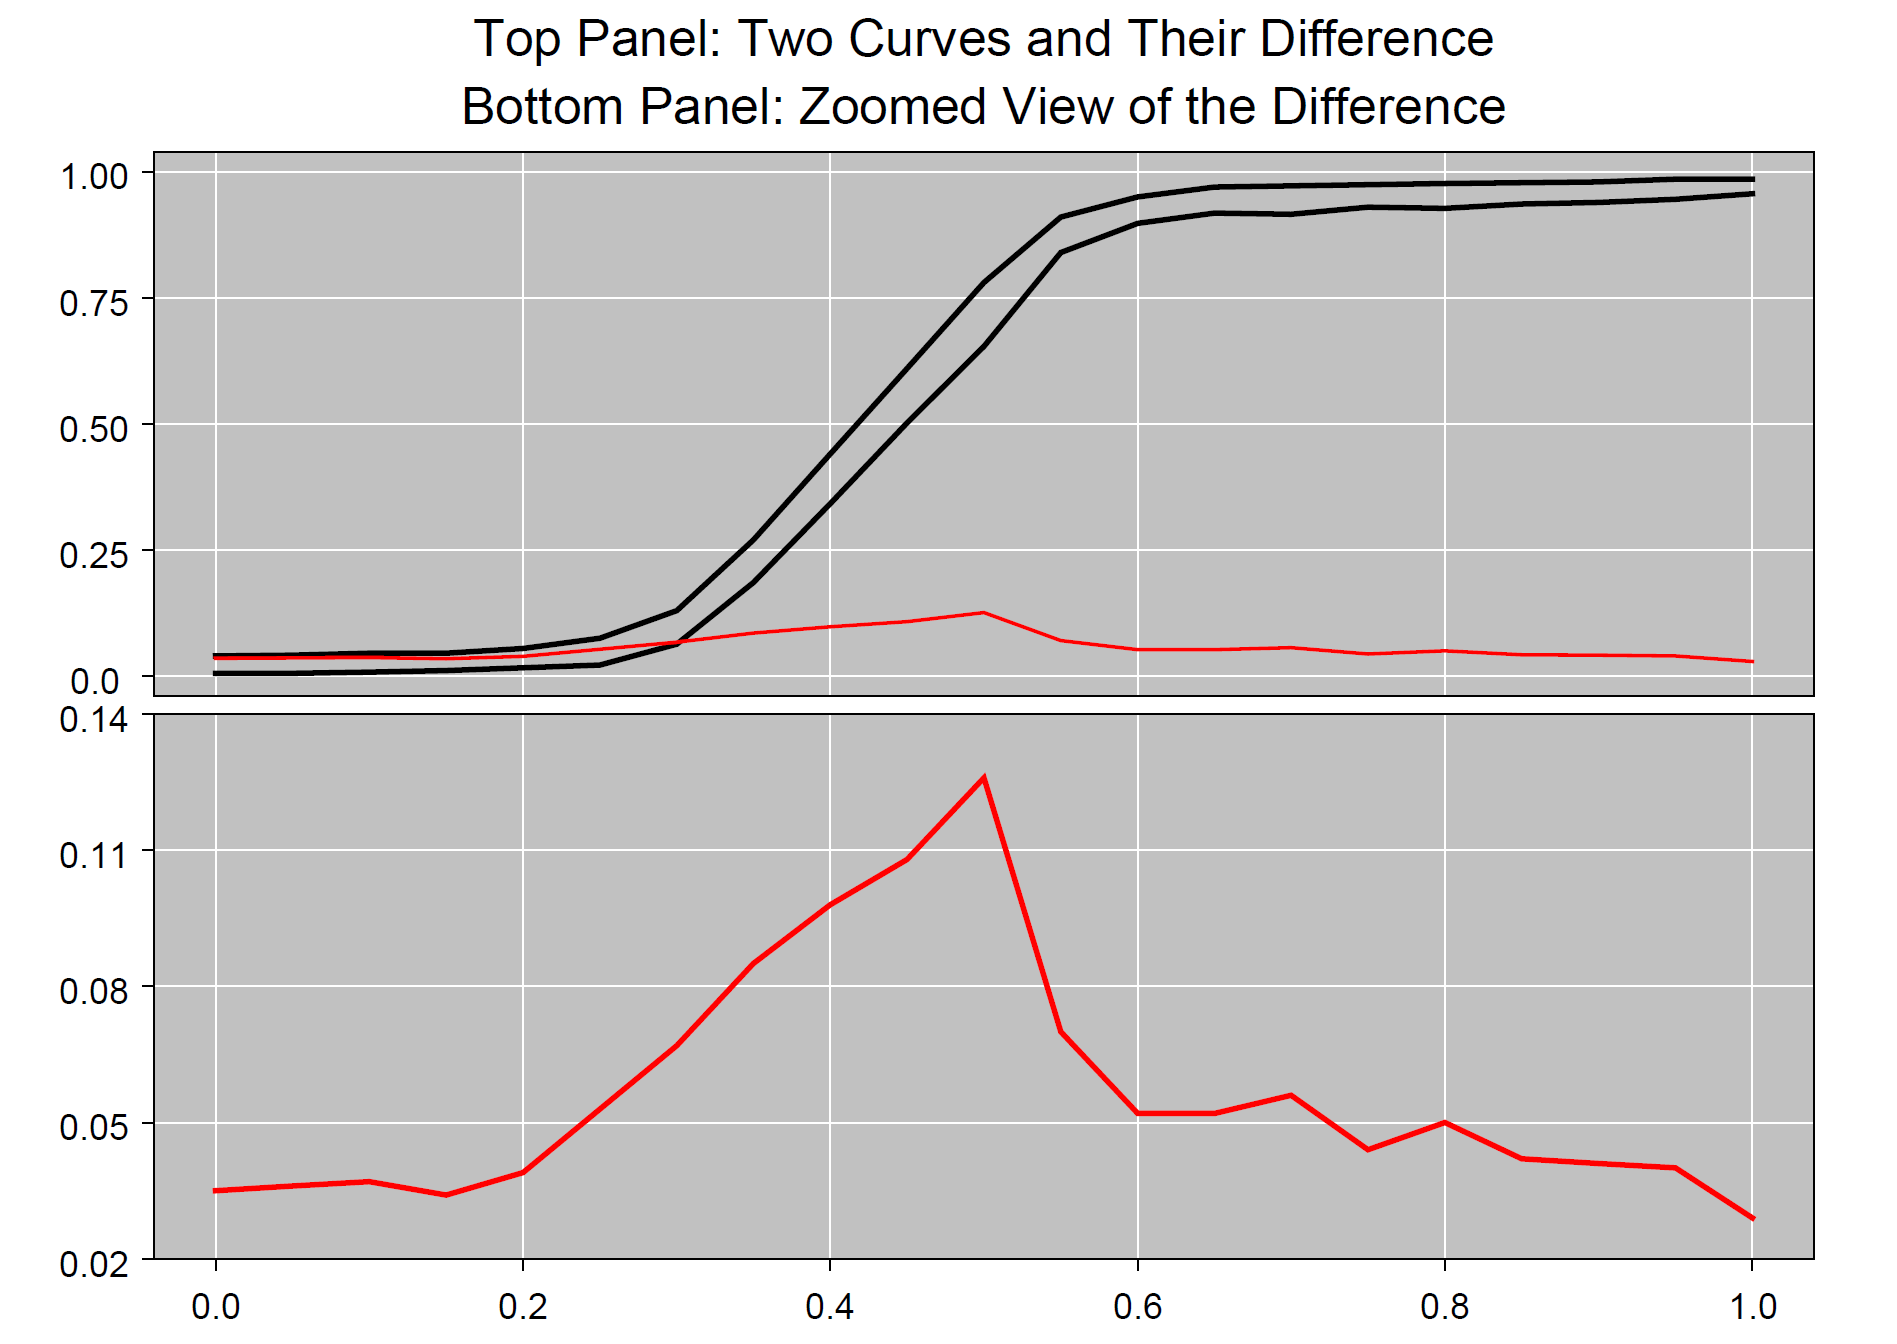

If you want to emphasize the difference in curves, why not plot the difference?

### 10.7 Quantitative graphic guidelines

Four general goals under tension
 - Enable accurate comparisons
 - Simplify appearance
 - Provide context for interpretation
 - Engage the reader/analyst
 
Use visual encodings with high perceptual accuracy of extraction
 - Best encodings: Position along a scale or along identical scales
 - Grid lines increase decoding and shape comparison accuracy
 - Good examples: Dot plots, bar charts, scatter plots, time series plots
 
Comparison layouts
 - Superimpose
 - Juxtapose with comparable scales
 - Show differences explicitly
 
Comparison accuracy decreases with distance
 - Organize to make key items for comparison close together

Context is important in comparisons
 - Provide reference lines
 - Control extraneous sources of variation